In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
import sklearn
sklearn.__version__

'1.2.2'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/loan_data.csv'

Mounted at /content/drive


In [4]:
df = pd.read_csv(path)

In [5]:
# We want to predict whether the loan is fully paid back or not

# Section 1: Exploratory Data Analysis

[Datacamp description of columns](https://app.datacamp.com/workspace/w/69b7e00f-5c40-403d-b21b-8a121f3bc660/edit)

**Columns and what they represent**

1.   credit.policy: 1 if the customer meets the credit underwriting criteria; 0 otherwise.
2.   purpose: The purpose of the loan.
3.   int_rate: The interest rate of the loan (more risky borrowers are assigned higher interest rates).
4.   installment: The monthly installments owed by the borrower if the loan is funded.
5.   log_annual_inc: The natural log of the self-reported annual income of the borrower.
6.   dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
7.   fico: The FICO credit score of the borrower.
8.   days_with_cr_line: The number of days the borrower has had a credit line.
9.   revol_bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
10.  revol_util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
11.  inq_last_6mths: The borrower's number of inquiries by creditors in the last 6 months.
12.  delinq_2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
13.  pub_rec: The borrower's number of derogatory public records.
14.  not_fully_paid: 1 if the loan is not fully paid; 0 otherwise.



In [6]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
df.shape

(9578, 14)

In [8]:
# Descriptive statistics
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


not.fully.paid column (whether loan is fully paid or not) seems to be skewed, as majority of the data contains people who pay off the loan.

In [9]:
# Data types for each column
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [10]:
# There seems to be no missing data in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [11]:
# create a function that renames each column with '.' to '_'
def change(column_name):
  split_list = column_name.split('.')
  new_column_name = '_'.join(split_list)
  return new_column_name

df.columns = df.columns.to_series().apply(change)
df.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


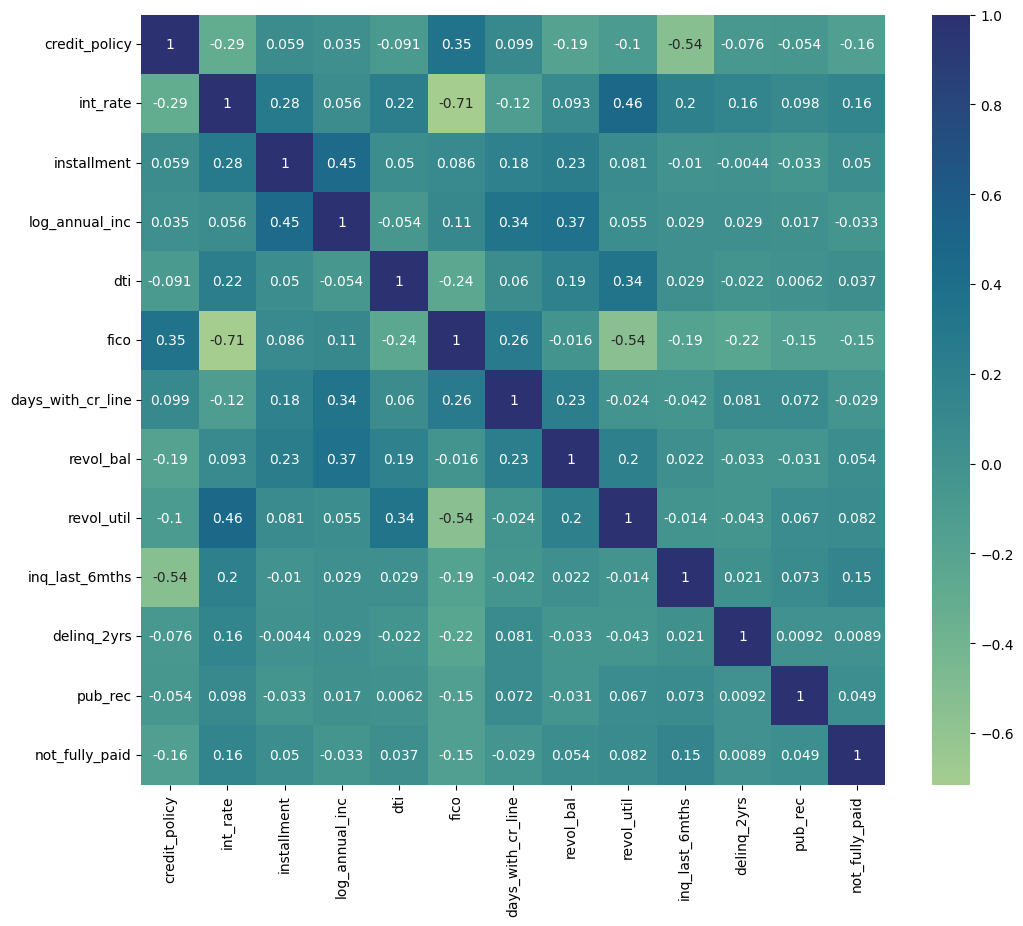

In [12]:
# Plot heatmap of columns

fig, ax = plt.subplots(figsize=(12,10))

sns.heatmap(
    data=df.corr(numeric_only=True),
    annot=True,
    cmap='crest'
)

plt.show()

fico scores and interest rates seem to be moderately correlated, so perhaps we can do some dimensionality reduction later on.

# Section 2: Data Visualization

Let's explore further the relationship between
1. fico and int_rate
2. inq_last_6mths and credit_policy

Text(0.5, 1.0, 'Scatter plot of fico against int_rate')

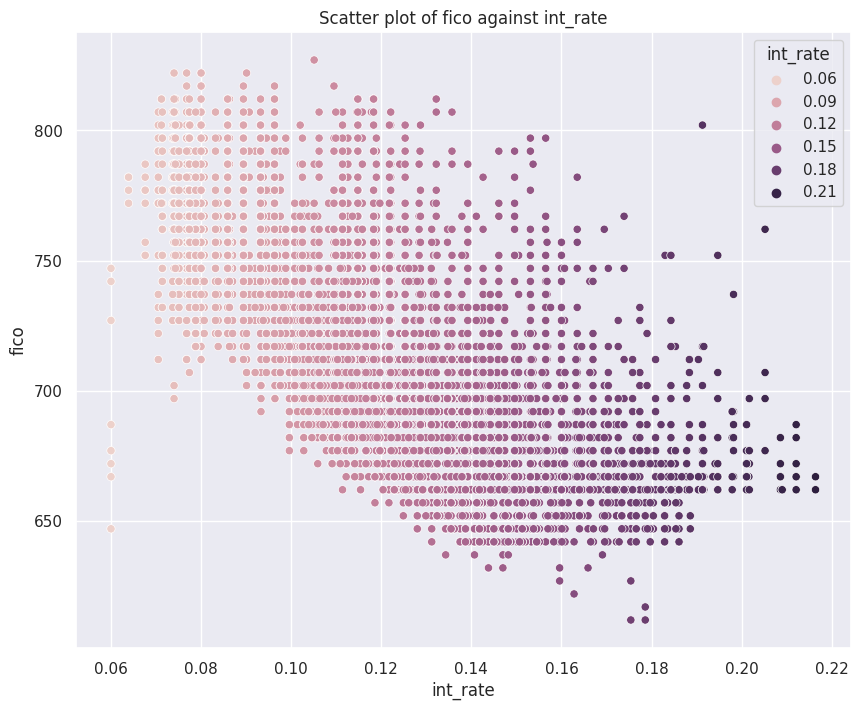

In [13]:
# scatterplot between fico and int_rate

sns.set(rc={'figure.figsize':(10,8)})

scatterplot = sns.scatterplot(data=df, x=df['int_rate'], y=df['fico'], hue='int_rate')

scatterplot.set_title('Scatter plot of fico against int_rate')

Overall, fico score decreases as interest rates increase

Text(0.5, 1.0, 'Plot of inq_last_6mths and credit_policy')

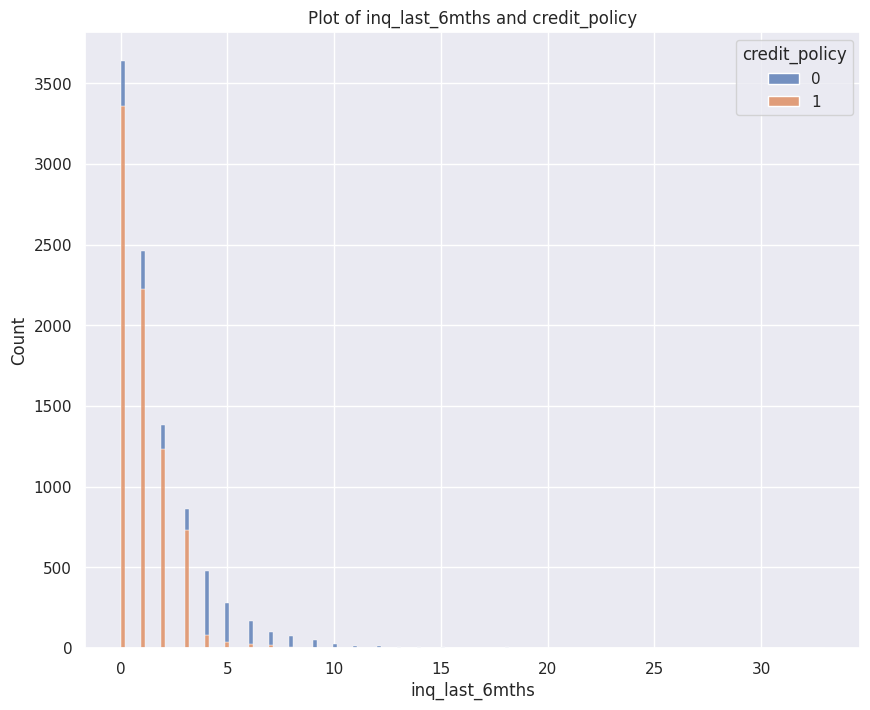

In [14]:
# relationship between inq_last_6mths and credit_policy
# both are discrete variables

sns.set(rc={'figure.figsize':(10,8)})

histplot = sns.histplot(data=df, x=df['inq_last_6mths'], hue='credit_policy', multiple='stack')

histplot.set_title('Plot of inq_last_6mths and credit_policy')

We can see that after more than 4 inq_last_6mths, the proportion of people who do not meet the credit underwriting criteria increases substantially.

In [15]:
# Define functions we can use to plot the different variables

def plot_continuous_variable(data: pd.DataFrame, column: str):
  # set style
  sns.set_style("darkgrid")
  # set figure size
  sns.set(rc={"figure.figsize":(10, 8)})
  # plot graph and set title
  sns.kdeplot(data=data, x=data[column], fill=True).set_title(f'Kernel Density Estimate of {column}')

def plot_discrete_variable(data: pd.DataFrame, column: str):
  # set style
  sns.set_style('darkgrid')
  # set figure size
  sns.set(rc={'figure.figsize':(10,8)})
  # plot graph and set title
  histplot = sns.histplot(data, x=column, discrete=True, hue=column)
  histplot.set_title(f'Histogram of {column}')
  # rotate x labels
  histplot.set_xticklabels(histplot.get_xticklabels(), rotation=45)

<ipython-input-15-734049c8a3fb>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  histplot.set_xticklabels(histplot.get_xticklabels(), rotation=45)


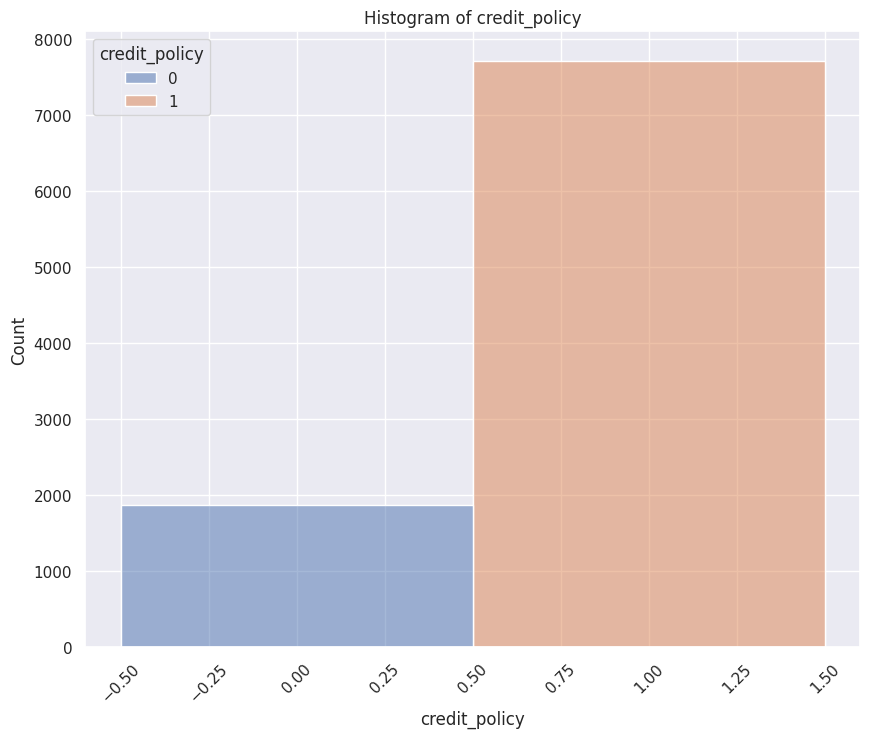

In [16]:
plot_discrete_variable(df, 'credit_policy')

<ipython-input-15-734049c8a3fb>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  histplot.set_xticklabels(histplot.get_xticklabels(), rotation=45)


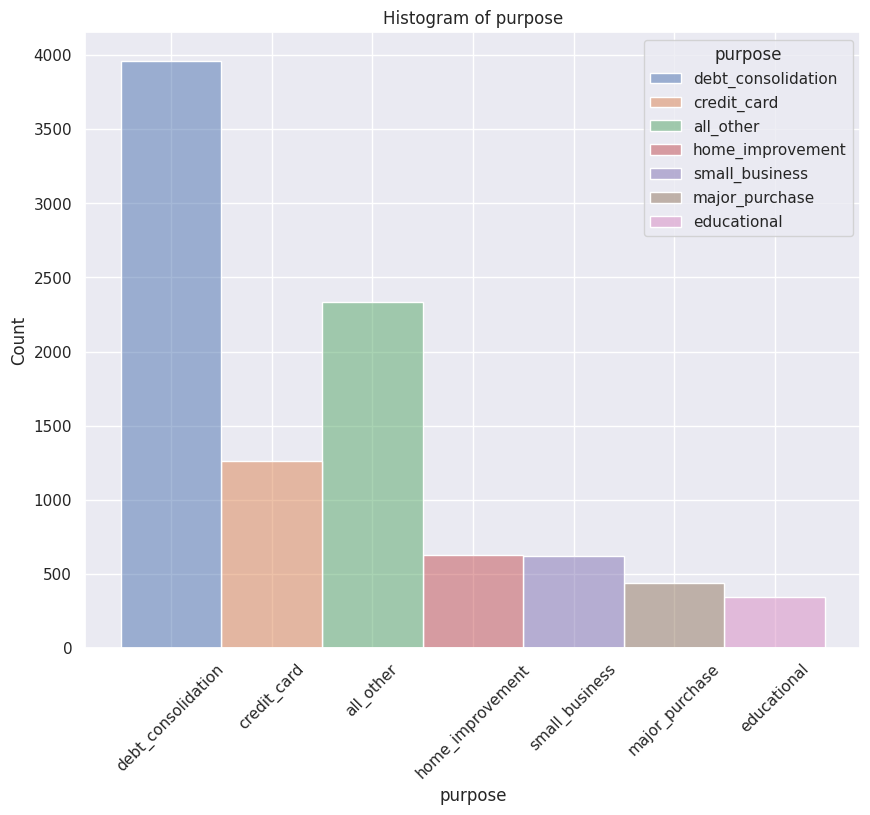

In [17]:
plot_discrete_variable(df, 'purpose')

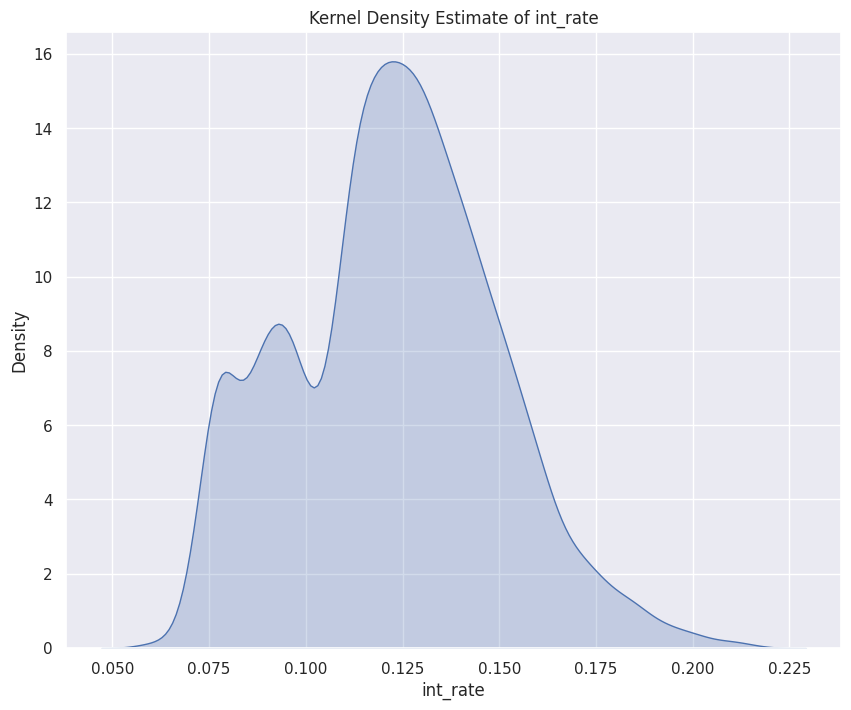

In [18]:
plot_continuous_variable(df, 'int_rate')

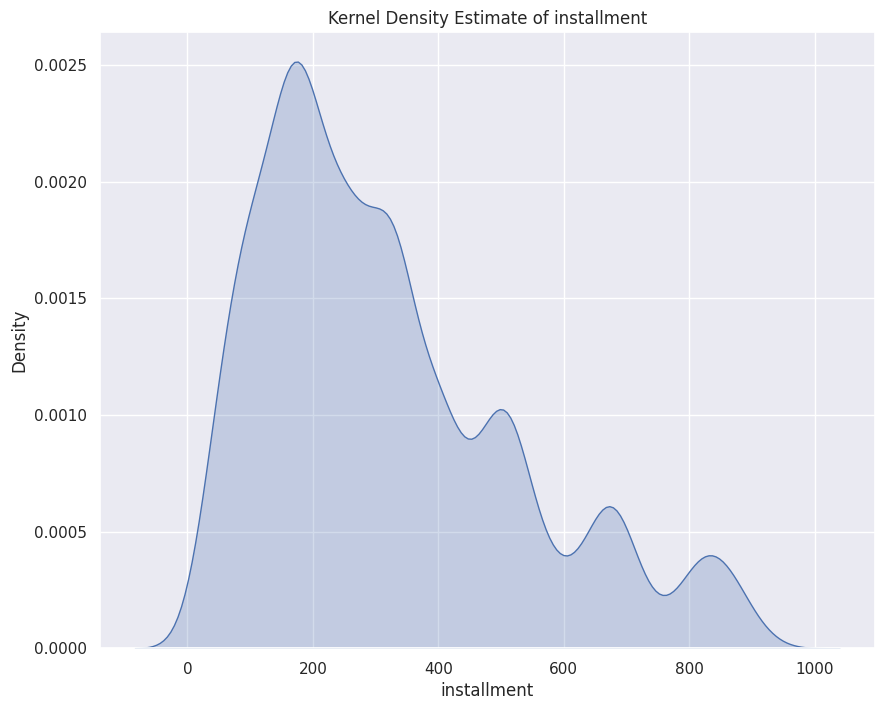

In [19]:
plot_continuous_variable(df, 'installment')

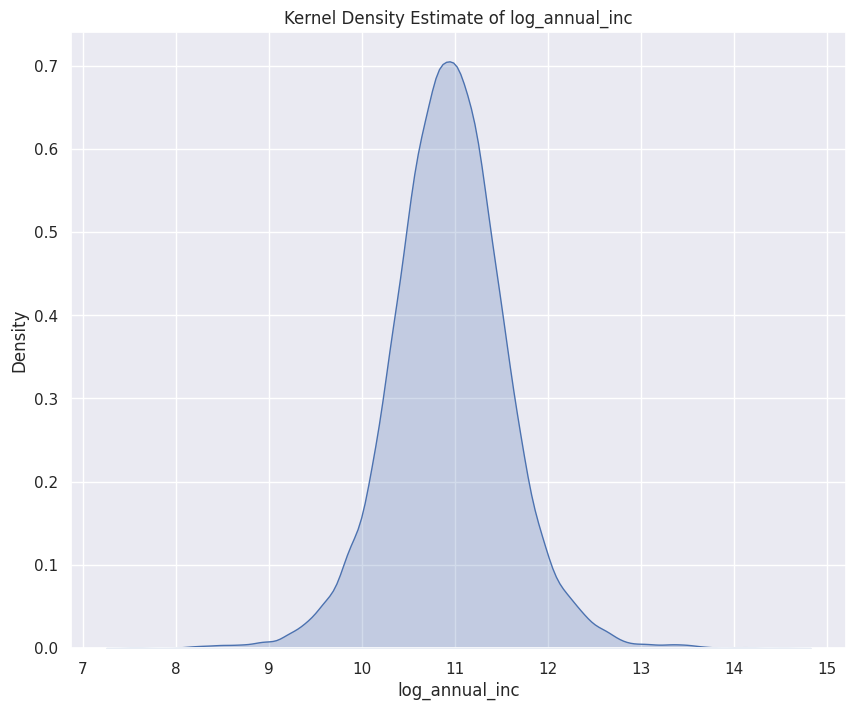

In [20]:
plot_continuous_variable(df, 'log_annual_inc')

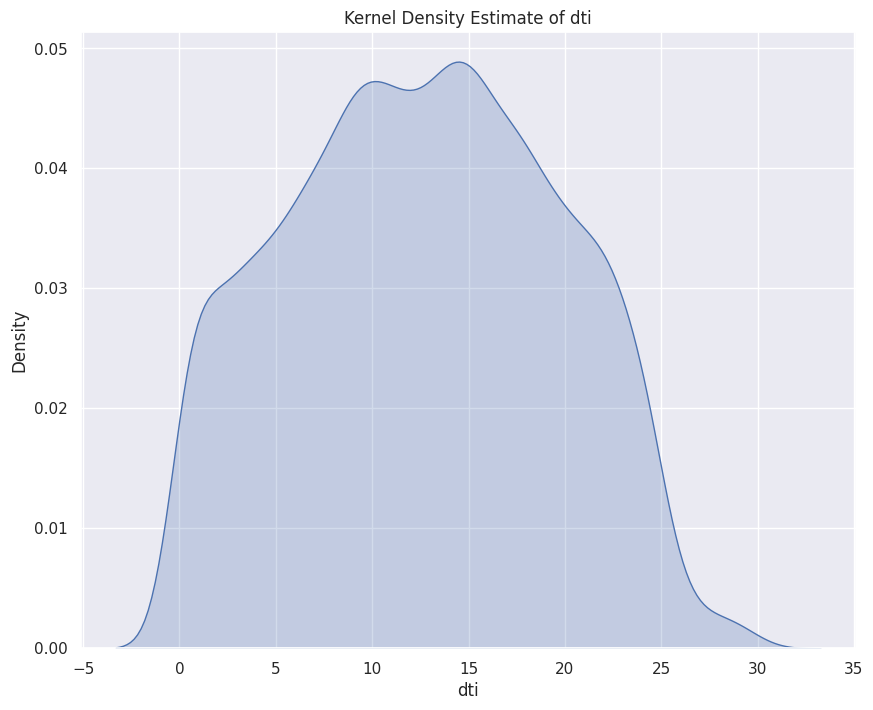

In [21]:
plot_continuous_variable(df, 'dti')

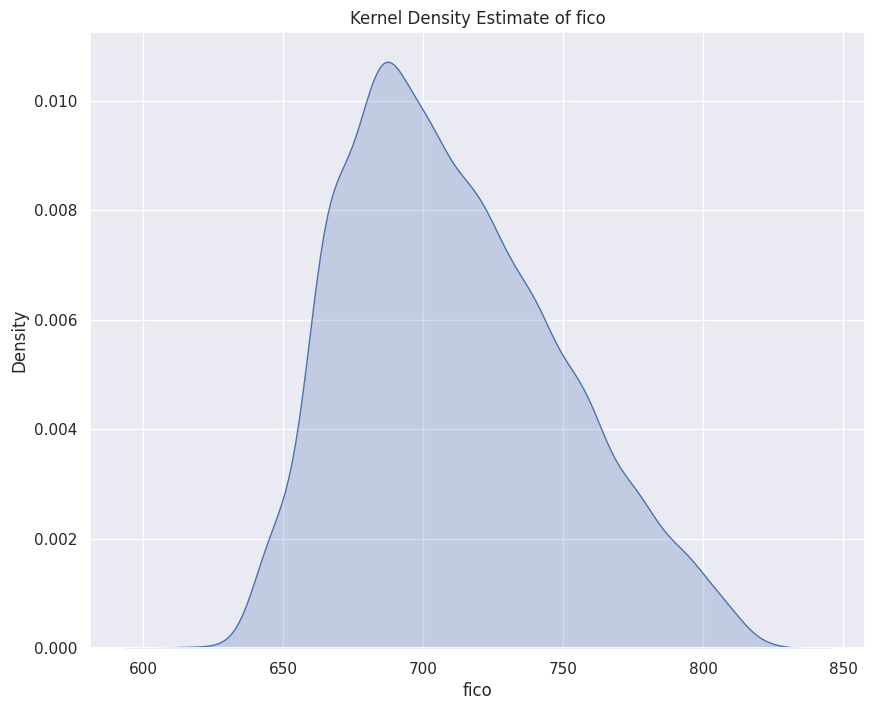

In [22]:
plot_continuous_variable(df, 'fico')

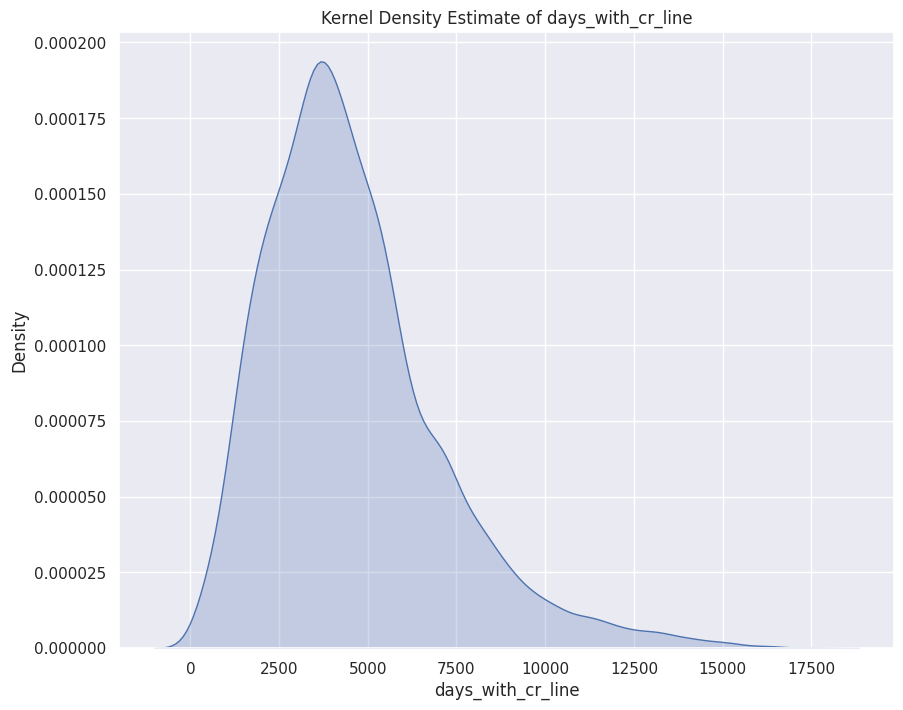

In [23]:
plot_continuous_variable(df, 'days_with_cr_line')

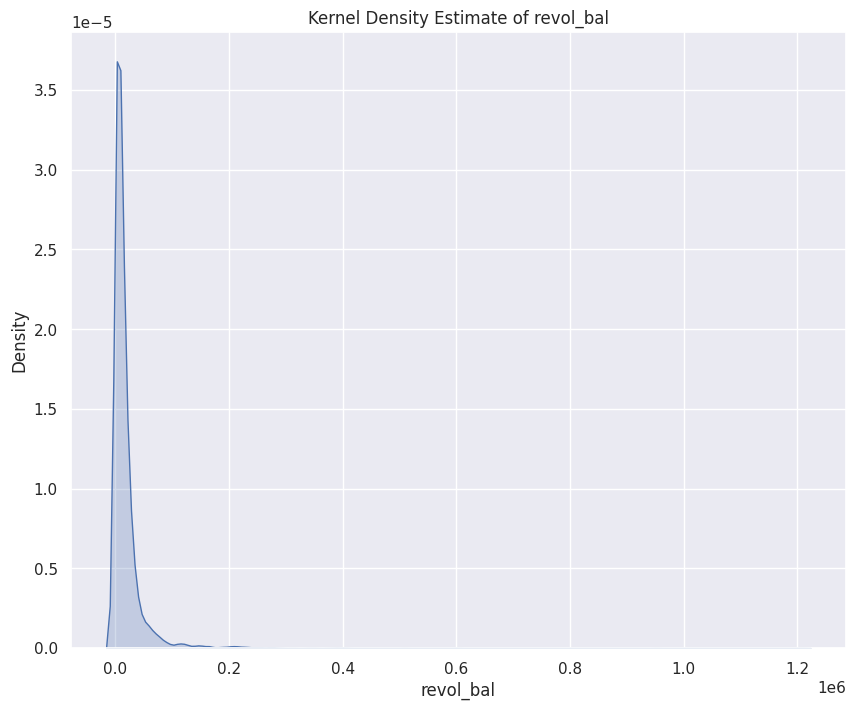

In [24]:
plot_continuous_variable(df, 'revol_bal')

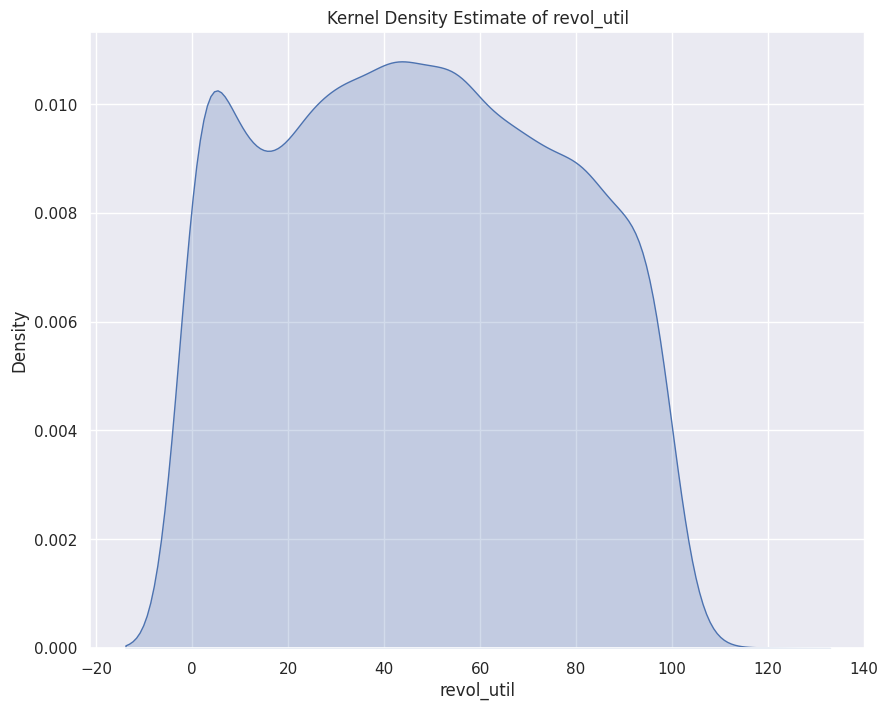

In [25]:
plot_continuous_variable(df, 'revol_util')

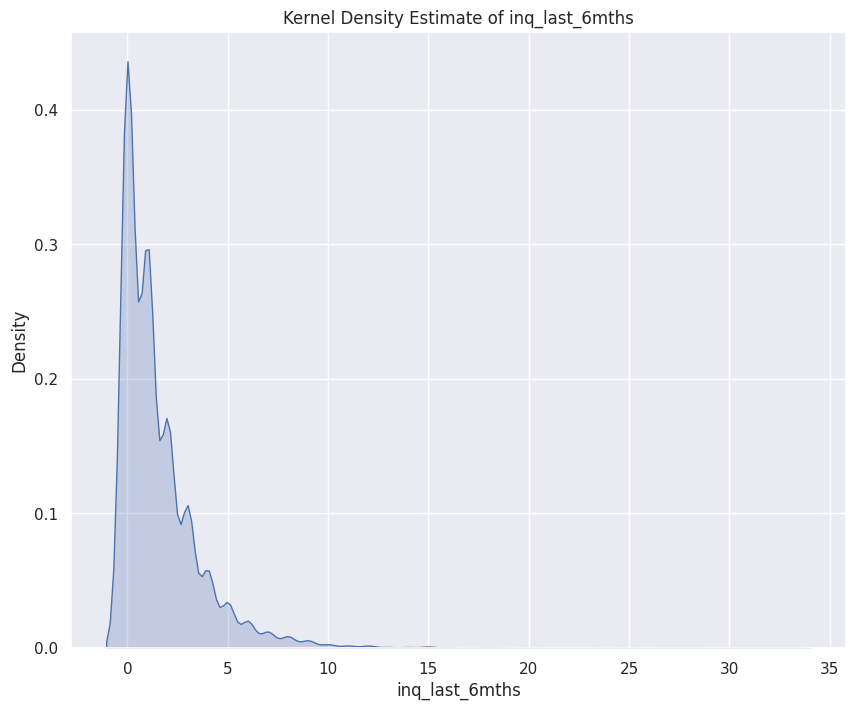

In [26]:
plot_continuous_variable(df, 'inq_last_6mths')

<ipython-input-15-734049c8a3fb>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  histplot.set_xticklabels(histplot.get_xticklabels(), rotation=45)


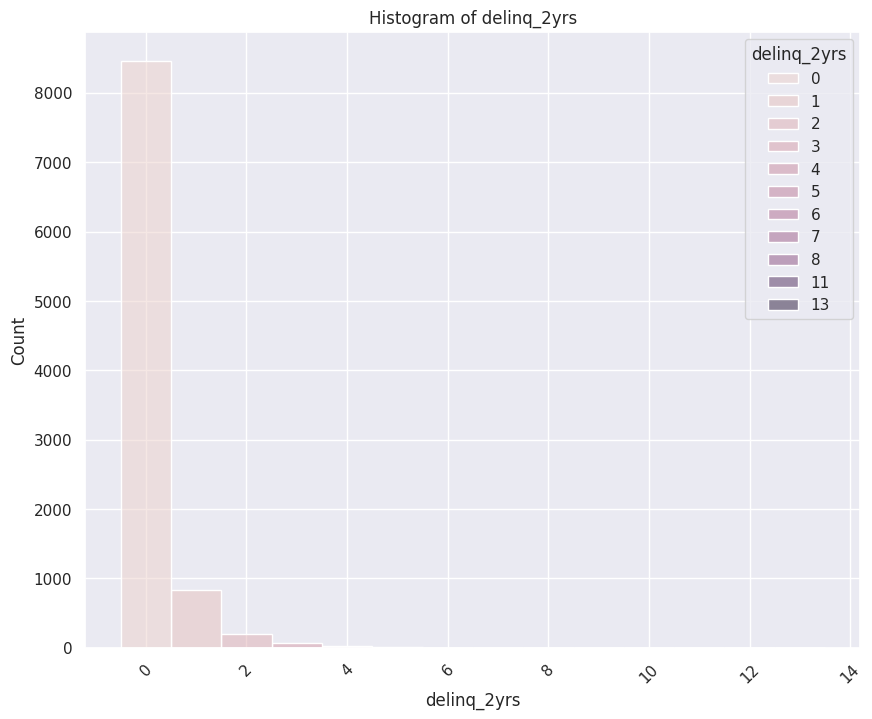

In [27]:
plot_discrete_variable(df, 'delinq_2yrs')

<ipython-input-15-734049c8a3fb>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  histplot.set_xticklabels(histplot.get_xticklabels(), rotation=45)


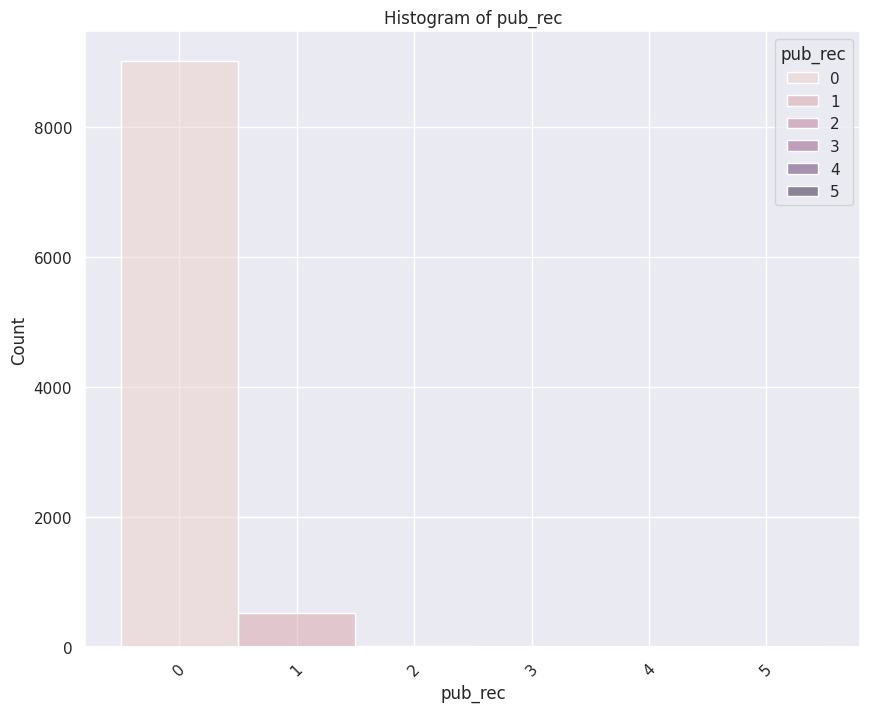

In [28]:
plot_discrete_variable(df, 'pub_rec')

<ipython-input-15-734049c8a3fb>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  histplot.set_xticklabels(histplot.get_xticklabels(), rotation=45)


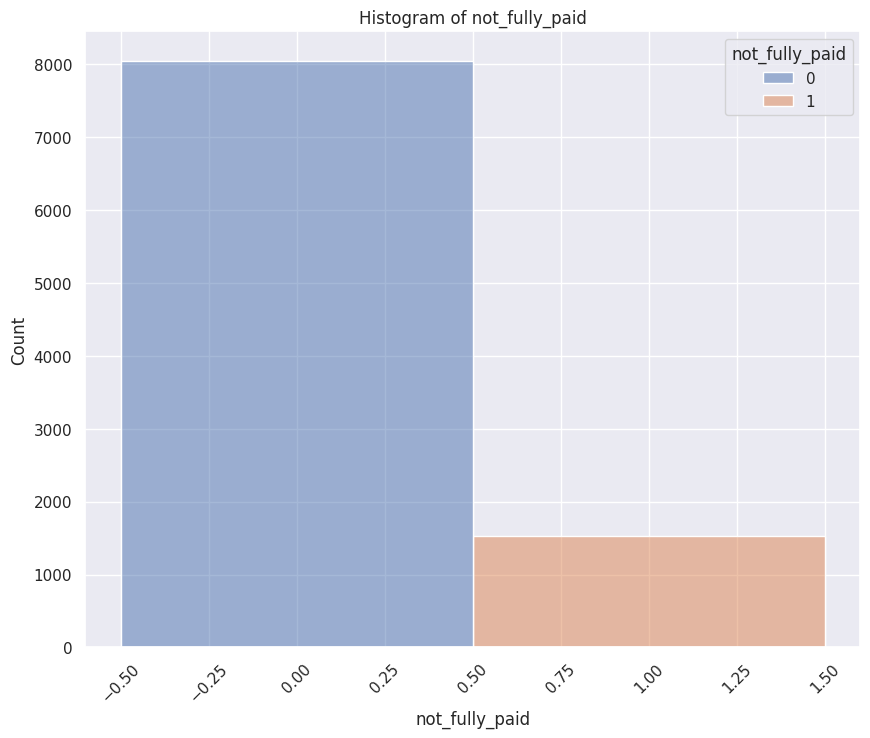

In [29]:
plot_discrete_variable(df, 'not_fully_paid')



1.   purpose: most of the data comes from people who want to do a debt consolidation, do one-hot encoding before applying machine learning models to it
2.   int_rate: use standardscaler to standardize the distribution
3.   installment: use standardscaler to standardize the distribution
4.   log_annual_inc: already looks normally distributed
5.   dti: use standardscaler
6.   fico: use standardscaler
7.   days_with_cr_line: standardscaler
8.   revol_bal: standardscaler
9.   revol_util: standardscaler
10.  inq_last_6mths: standardscaler
11.  delinq_2yrs: standardscaler


Furthermore, we have an imbalanced dataset where most of the data points have people who fully paid the loan.

As such, we can use some techniques to handle imbalanced data such as:
1. under-sampling
2. over-sampling (SMOTE, ADASYN, Hybridization: SMOTE + Tomek Links, Hybridization: SMOTE + ENN, Ensemble method)


# Section 3: Feature Engineering

In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [31]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df[['purpose']])

# encoded features are stored as an array
feature_array = enc.transform(df[['purpose']]).toarray()

# store the categories as a list
feature_labels = enc.categories_
feature_labels = np.array(feature_labels).ravel()

# create a new DataFrame with encodede features
encoded_features = pd.DataFrame(feature_array, columns=feature_labels)
encoded_features.head()

,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# concatenate the two dataframes together
df1 = pd.concat([df, encoded_features], axis=1)
df1.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,...,delinq_2yrs,pub_rec,not_fully_paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,...,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,...,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# convert encoded columns to integer type
for col in feature_labels:
  df1[col] = df1[col].astype(int)

df1.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,...,delinq_2yrs,pub_rec,not_fully_paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,...,0,0,0,0,0,1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,...,0,0,0,0,1,0,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,...,0,0,0,0,0,1,0,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,...,0,0,0,0,0,1,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,...,1,0,0,0,1,0,0,0,0,0


In [34]:
# move value we want to predict to the last column of the dataframe again
df1 = df1[[col for col in df1.columns if col != 'not_fully_paid'] + ['not_fully_paid']]
df1.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,...,delinq_2yrs,pub_rec,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,...,0,0,0,0,1,0,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,...,0,0,0,1,0,0,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,...,0,0,0,0,1,0,0,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,...,0,0,0,0,1,0,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,...,1,0,0,1,0,0,0,0,0,0


In [35]:
# drop 'purpose' column
df1.drop(columns='purpose', inplace=True)
df1.head()

<ipython-input-35-7fc15f89e3b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns='purpose', inplace=True)


,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business,not_fully_paid
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0,0


In [36]:
# scale the features using scikit-learn's standard scaler
columns_to_transform = ['int_rate', 'installment', 'log_annual_inc', 'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util', 'inq_last_6mths', 'delinq_2yrs']

scaler = StandardScaler()

df1[columns_to_transform] = scaler.fit_transform(df1[columns_to_transform])
df1.head()

<ipython-input-36-84195c8e6eef>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[columns_to_transform] = scaler.fit_transform(df1[columns_to_transform])


,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business,not_fully_paid
0,1,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,-0.716989,-0.299730,0,0,0,1,0,0,0,0,0
1,1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,-0.716989,-0.299730,0,0,1,0,0,0,0,0,0
2,1,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,-0.262470,-0.299730,0,0,0,1,0,0,0,0,0
3,1,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,-0.262470,-0.299730,0,0,0,1,0,0,0,0,0
4,1,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,-0.716989,1.531147,0,0,1,0,0,0,0,0,0


# Section 4: Dealing with imbalanced data

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import matthews_corrcoef

In [38]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import AdaBoostClassifier

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop(columns='not_fully_paid'), df1['not_fully_paid'], test_size=0.2, random_state=42)

In [40]:
# here we can see that in the training set, people who do not fully pay the loan are under-represented
y_train.value_counts()

0    6434
1    1228
Name: not_fully_paid, dtype: int64

Using SMOTE to create new samples

[Article on various techniques](https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/#:~:text=its%20related%20counterparts.-,SMOTE%3A%20Synthetic%20Minority%20Oversampling%20Technique,problem%20posed%20by%20random%20oversampling.)

We are interested in minimizing the number of false negatives, so we want to maximize recall as much as possible.

This is because the cost of false negatives are much more costly to us than compared to the cost of false positives.

In [41]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [42]:
# now we have a more balanced training set
y_sm.value_counts()

0    6434
1    6434
Name: not_fully_paid, dtype: int64

Using ADASYN to create new samples

In [43]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state=42)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

Hybridization: SMOTE + Tomek links

In [44]:
from imblearn.combine import SMOTETomek

smtom = SMOTETomek(random_state=42)
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)

y_train_smtom.value_counts()

0    6413
1    6413
Name: not_fully_paid, dtype: int64

In [45]:
from imblearn.combine import SMOTEENN

smenn = SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train, y_train)
y_train_smenn.value_counts()

1    6064
0    3310
Name: not_fully_paid, dtype: int64

We'll try each of these methods later when performing a grid search to see which method works best

# Section 5: Creating a pipeline

In [46]:
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from imblearn.under_sampling import RandomUnderSampler

numeric_features = ['int_rate', 'installment', 'log_annual_inc', 'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util', 'inq_last_6mths', 'delinq_2yrs']
categorical_features = ['purpose']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('encode', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('column_dropper', 'drop', ['purpose'])
    ]
)

clf = Pipeline(
    steps=[('preprocessor', preprocessor), ('under sampler', RandomUnderSampler(sampling_strategy=1, random_state=42)), ('classifier', LogisticRegression())]
)

In [51]:
# turn this into a function we can call for other models

def create_pipeline(classifier):
  numeric_features = ['int_rate', 'installment', 'log_annual_inc', 'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util', 'inq_last_6mths', 'delinq_2yrs']
  categorical_features = ['purpose']

  numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
  categorical_transformer = Pipeline(steps=[('encode', OneHotEncoder(handle_unknown='ignore'))])

  preprocessor = ColumnTransformer(
      transformers=[
          ('num', numeric_transformer, numeric_features),
          ('cat', categorical_transformer, categorical_features),
          ('column_dropper', 'drop', ['purpose'])
      ]
  )

  clf = Pipeline(
      steps=[('preprocessor', preprocessor), ('SMOTE', SMOTE(random_state=42)), ('classifier', classifier)]
  )

  return clf

In [52]:
# train test split data
X = df.drop(columns='not_fully_paid')
y = df['not_fully_paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Logistic Regression Model**

In [ ]:
logistic_regression = create_pipeline(LogisticRegression())

In [ ]:
# take a look at the pipeline
logistic_regression

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['int_rate', 'installment',
                                                   'log_annual_inc', 'dti',
                                                   'fico', 'days_with_cr_line',
                                                   'revol_bal', 'revol_util',
                                                   'inq_last_6mths',
                                                   'delinq_2yrs']),
                                                 ('cat',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['purpose']),
                                                 ('column_dropper', 'drop',
                                                  ['purpose'])])),
                ('SMOTE', SMOTE(random_state=42)),
                ('classifier', LogisticRegression())])

In [ ]:
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

print(classification_report(y_test, y_pred))
roc_auc_score(y_test, logistic_regression.predict_proba(X_test)[:,1])

              precision    recall  f1-score   support

           0       0.91      0.61      0.73      1611
           1       0.25      0.70      0.37       305

    accuracy                           0.62      1916
   macro avg       0.58      0.65      0.55      1916
weighted avg       0.81      0.62      0.67      1916



0.7049302439173307

**Decision Tree Model**

In [ ]:
decision_tree = create_pipeline(DecisionTreeClassifier())

decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))
roc_auc_score(y_test,decision_tree.predict_proba(X_test)[:,1])

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1611
           1       0.22      0.28      0.24       305

    accuracy                           0.72      1916
   macro avg       0.54      0.54      0.54      1916
weighted avg       0.75      0.72      0.74      1916



0.5427328509936808

**Random Forest Model**

In [ ]:
rf = create_pipeline(RandomForestClassifier())

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1611
           1       0.29      0.11      0.16       305

    accuracy                           0.81      1916
   macro avg       0.57      0.53      0.53      1916
weighted avg       0.76      0.81      0.78      1916



0.6434166742986231

**Support Vector Classifier**

In [ ]:
svc = create_pipeline(SVC(probability=True))

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))
roc_auc_score(y_test, svc.predict_proba(X_test)[:,1])

              precision    recall  f1-score   support

           0       0.89      0.66      0.76      1611
           1       0.24      0.57      0.34       305

    accuracy                           0.65      1916
   macro avg       0.57      0.62      0.55      1916
weighted avg       0.79      0.65      0.69      1916



0.643272175921686

**K Neighbours Classifier**

In [ ]:
k_neighbours = create_pipeline(KNeighborsClassifier())

k_neighbours.fit(X_train, y_train)
y_pred = k_neighbours.predict(X_test)

print(classification_report(y_test, y_pred))
roc_auc_score(y_test, k_neighbours.predict_proba(X_test)[:,1])

              precision    recall  f1-score   support

           0       0.87      0.63      0.73      1611
           1       0.20      0.49      0.29       305

    accuracy                           0.61      1916
   macro avg       0.54      0.56      0.51      1916
weighted avg       0.76      0.61      0.66      1916



0.5850189781319006

XGBClassifier

In [66]:
from xgboost import XGBClassifier

xgb_rf = create_pipeline(XGBClassifier(random_state=42))
xgb_rf.fit(X_train, y_train)

y_pred = xgb_rf.predict(X_test)

print(classification_report(y_test, y_pred))
roc_auc_score(y_test, xgb_rf.predict_proba(X_test)[:,1])

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1611
           1       0.28      0.14      0.18       305

    accuracy                           0.81      1916
   macro avg       0.56      0.53      0.54      1916
weighted avg       0.76      0.81      0.78      1916



0.6215607859897629

# Section 6: Tuning models

1. **Tuning Logisitc Regression Model**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import recall_score, make_scorer, roc_curve, RocCurveDisplay, auc

In [ ]:
param_grid = {
    'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'classifier__C': np.logspace(-4, 4, 10),
    'classifier__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'classifier__max_iter': [100, 1000, 2500, 5000, 7500, 10000]
}

In [ ]:
scorer = make_scorer(
    recall_score,
    greater_is_better=True
)


log_reg = create_pipeline(LogisticRegression())
random_log_reg = RandomizedSearchCV(log_reg, param_distributions=param_grid, cv=3, scoring=scorer, verbose=3, n_iter=500)

In [ ]:
random_log_reg.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
[CV 1/3] END classifier__C=166.81005372000558, classifier__max_iter=100, classifier__penalty=elasticnet, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=166.81005372000558, classifier__max_iter=100, classifier__penalty=elasticnet, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=166.81005372000558, classifier__max_iter=100, classifier__penalty=elasticnet, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=0.005994842503189409, classifier__max_iter=1000, classifier__penalty=l1, classifier__solver=saga;, score=0.584 total time=   0.1s
[CV 2/3] END classifier__C=0.005994842503189409, classifier__max_iter=1000, classifier__penalty=l1, classifier__solver=saga;, score=0.597 total time=   0.1s
[CV 3/3] END classifier__C=0.005994842503189409, classifier__max_iter=1000, classifier__penalty=l1, classifie

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 2/3] END classifier__C=2.782559402207126, classifier__max_iter=2500, classifier__penalty=none, classifier__solver=lbfgs;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=2.782559402207126, classifier__max_iter=2500, classifier__penalty=none, classifier__solver=lbfgs;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=0.3593813663804626, classifier__max_iter=100, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=0.3593813663804626, classifier__max_iter=100, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.584 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=5.32499e-17): result may not be accurate.
  warnings.warn(
/usr/local/lib/py

[CV 3/3] END classifier__C=0.3593813663804626, classifier__max_iter=100, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=2.782559402207126, classifier__max_iter=7500, classifier__penalty=l1, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=2.782559402207126, classifier__max_iter=7500, classifier__penalty=l1, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=2.782559402207126, classifier__max_iter=7500, classifier__penalty=l1, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=10000.0, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=10000.0, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=10000.0, classifier

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 2/3] END classifier__C=10000.0, classifier__max_iter=100, classifier__penalty=none, classifier__solver=sag;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=10000.0, classifier__max_iter=100, classifier__penalty=none, classifier__solver=sag;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=0.3593813663804626, classifier__max_iter=10000, classifier__penalty=l2, classifier__solver=sag;, score=0.601 total time=   0.3s
[CV 2/3] END classifier__C=0.3593813663804626, classifier__max_iter=10000, classifier__penalty=l2, classifier__solver=sag;, score=0.584 total time=   0.3s
[CV 3/3] END classifier__C=0.3593813663804626, classifier__max_iter=10000, classifier__penalty=l2, classifier__solver=sag;, score=0.610 total time=   0.3s
[CV 1/3] END classifier__C=0.000774263682681127, classifier__max_iter=100, classifier__penalty=l2, classifier__solver=sag;, score=0.597 total time=   0.1s
[CV 2/3] END classifier__C=0.000774263682681127, classifier__max_iter=100, classifier__penal

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=5.32499e-17): result may not be accurate.
  warnings.warn(
/usr/local/lib/py

[CV 1/3] END classifier__C=0.046415888336127774, classifier__max_iter=2500, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=0.046415888336127774, classifier__max_iter=2500, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=0.046415888336127774, classifier__max_iter=2500, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=21.54434690031882, classifier__max_iter=1000, classifier__penalty=elasticnet, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=21.54434690031882, classifier__max_iter=1000, classifier__penalty=elasticnet, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=21.54434690031882, classifier__max_iter=1000, classifier__penalty=elasticnet, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3] END classifier__C=166.81005372000558, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=saga;, score=0.584 total time=   0.2s
[CV 3/3] END classifier__C=166.81005372000558, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=saga;, score=0.607 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/3] END classifier__C=166.81005372000558, classifier__max_iter=100, classifier__penalty=none, classifier__solver=sag;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=166.81005372000558, classifier__max_iter=100, classifier__penalty=none, classifier__solver=sag;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=166.81005372000558, classifier__max_iter=100, classifier__penalty=none, classifier__solver=sag;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=10000.0, classifier__max_iter=7500, classifier__penalty=l2, classifier__solver=newton-cg;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=10000.0, classifier__max_iter=7500, classifier__penalty=l2, classifier__solver=newton-cg;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=10000.0, classifier__max_iter=7500, classifier__penalty=l2, classifier__solver=newton-cg;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=166.81005372000558, classifier__max_iter=10000, classifier__p

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=0.000774263682681127, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=saga;, score=0.601 total time=   0.2s
[CV 2/3] END classifier__C=0.000774263682681127, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=saga;, score=0.584 total time=   0.2s
[CV 3/3] END classifier__C=0.000774263682681127, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=saga;, score=0.607 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditione

[CV 1/3] END classifier__C=166.81005372000558, classifier__max_iter=100, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=166.81005372000558, classifier__max_iter=100, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=166.81005372000558, classifier__max_iter=100, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=10000.0, classifier__max_iter=7500, classifier__penalty=l1, classifier__solver=liblinear;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=10000.0, classifier__max_iter=7500, classifier__penalty=l1, classifier__solver=liblinear;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=10000.0, classifier__max_iter=7500, classifier__penalty=l1, classifier__solver=liblinear;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=0.000774263682681127, cla

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=0.005994842503189409, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=newton-cg;, score=0.601 total time=   0.2s
[CV 2/3] END classifier__C=0.005994842503189409, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=newton-cg;, score=0.584 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3] END classifier__C=0.005994842503189409, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=newton-cg;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=0.000774263682681127, classifier__max_iter=5000, classifier__penalty=elasticnet, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=0.000774263682681127, classifier__max_iter=5000, classifier__penalty=elasticnet, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=0.000774263682681127, classifier__max_iter=5000, classifier__penalty=elasticnet, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=2.782559402207126, classifier__max_iter=7500, classifier__penalty=elasticnet, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=2.782559402207126, classifier__max_iter=7500, classifier__penalty=elasticnet, classifier__solver=liblinear;, score=nan total time=   0.1s
[C

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=2.782559402207126, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=saga;, score=0.601 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3] END classifier__C=2.782559402207126, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=saga;, score=0.584 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3] END classifier__C=2.782559402207126, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=saga;, score=0.607 total time=   0.3s
[CV 1/3] END classifier__C=21.54434690031882, classifier__max_iter=100, classifier__penalty=elasticnet, classifier__solver=sag;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=21.54434690031882, classifier__max_iter=100, classifier__penalty=elasticnet, classifier__solver=sag;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=21.54434690031882, classifier__max_iter=100, classifier__penalty=elasticnet, classifier__solver=sag;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=0.0001, classifier__max_iter=10000, classifier__penalty=l2, classifier__solver=lbfgs;, score=0.611 total time=   0.0s
[CV 2/3] END classifier__C=0.0001, classifier__max_iter=10000, classifier__penalty=l2, classifier__solver=lbfgs;, score=0.606 total time=   0.0s
[CV 3/3] END classifier__C=0.0001, classifier__max_iter=10000, classifier__penal

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/3] END classifier__C=10000.0, classifier__max_iter=2500, classifier__penalty=none, classifier__solver=newton-cg;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=10000.0, classifier__max_iter=2500, classifier__penalty=none, classifier__solver=newton-cg;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=10000.0, classifier__max_iter=2500, classifier__penalty=none, classifier__solver=newton-cg;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=166.81005372000558, classifier__max_iter=5000, classifier__penalty=l1, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=166.81005372000558, classifier__max_iter=5000, classifier__penalty=l1, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=166.81005372000558, classifier__max_iter=5000, classifier__penalty=l1, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=1291.5496650148827, classifier__max_iter=5000, classifier_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3] END classifier__C=1291.5496650148827, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=saga;, score=0.584 total time=   0.2s
[CV 3/3] END classifier__C=1291.5496650148827, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=saga;, score=0.607 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=166.81005372000558, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=166.81005372000558, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=166.81005372000558, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=21.54434690031882, classifier__max_iter=1000, classifier__penalty=l1, classifier__solver=liblinear;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=21.54434690031882, classifier__max_iter=1000, classifier__penalty=l1, classifier__solver=liblinear;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=21.54434690031882, classifier__max_iter=1000, classifier__penalty=l1, classifier__solver=liblinear;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=21.5443469003188

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3] END classifier__C=21.54434690031882, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=sag;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=21.54434690031882, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=sag;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=0.3593813663804626, classifier__max_iter=1000, classifier__penalty=l2, classifier__solver=lbfgs;, score=0.601 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3] END classifier__C=0.3593813663804626, classifier__max_iter=1000, classifier__penalty=l2, classifier__solver=lbfgs;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=0.3593813663804626, classifier__max_iter=1000, classifier__penalty=l2, classifier__solver=lbfgs;, score=0.610 total time=   0.1s
[CV 1/3] END classifier__C=1291.5496650148827, classifier__max_iter=2500, classifier__penalty=elasticnet, classifier__solver=sag;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=1291.5496650148827, classifier__max_iter=2500, classifier__penalty=elasticnet, classifier__solver=sag;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=1291.5496650148827, classifier__max_iter=2500, classifier__penalty=elasticnet, classifier__solver=sag;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=10000.0, classifier__max_iter=1000, classifier__penalty=l2, classifier__solver=saga;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=10000.0, classifier__max_iter=1000, c

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=5.32499e-17): result may not be accurate.
  warnings.warn(
/usr/local/lib/py

[CV 1/3] END classifier__C=1291.5496650148827, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=1291.5496650148827, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=1291.5496650148827, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=0.046415888336127774, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=lbfgs;, score=0.601 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3] END classifier__C=0.046415888336127774, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=lbfgs;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=0.046415888336127774, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=lbfgs;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=0.3593813663804626, classifier__max_iter=7500, classifier__penalty=elasticnet, classifier__solver=sag;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=0.3593813663804626, classifier__max_iter=7500, classifier__penalty=elasticnet, classifier__solver=sag;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=0.3593813663804626, classifier__max_iter=7500, classifier__penalty=elasticnet, classifier__solver=sag;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=21.54434690031882, classifier__max_iter=5000, classifier__penalty=l1, classifier__solver=saga;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=21.54434690031882, 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3] END classifier__C=2.782559402207126, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=saga;, score=0.584 total time=   0.2s
[CV 3/3] END classifier__C=2.782559402207126, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=saga;, score=0.607 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=0.000774263682681127, classifier__max_iter=100, classifier__penalty=elasticnet, classifier__solver=saga;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=0.000774263682681127, classifier__max_iter=100, classifier__penalty=elasticnet, classifier__solver=saga;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=0.000774263682681127, classifier__max_iter=100, classifier__penalty=elasticnet, classifier__solver=saga;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=0.000774263682681127, classifier__max_iter=1000, classifier__penalty=elasticnet, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=0.000774263682681127, classifier__max_iter=1000, classifier__penalty=elasticnet, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=0.000774263682681127, classifier__max_iter=1000, classifier__penalty=elasticnet, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 1/3] E

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3] END classifier__C=0.3593813663804626, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=saga;, score=0.584 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3] END classifier__C=0.3593813663804626, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=saga;, score=0.607 total time=   0.3s
[CV 1/3] END classifier__C=0.005994842503189409, classifier__max_iter=2500, classifier__penalty=none, classifier__solver=lbfgs;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=0.005994842503189409, classifier__max_iter=2500, classifier__penalty=none, classifier__solver=lbfgs;, score=0.584 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 3/3] END classifier__C=0.005994842503189409, classifier__max_iter=2500, classifier__penalty=none, classifier__solver=lbfgs;, score=0.607 total time=   0.2s
[CV 1/3] END classifier__C=166.81005372000558, classifier__max_iter=100, classifier__penalty=l1, classifier__solver=newton-cholesky;, score=nan total time=   0.2s
[CV 2/3] END classifier__C=166.81005372000558, classifier__max_iter=100, classifier__penalty=l1, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=166.81005372000558, classifier__max_iter=100, classifier__penalty=l1, classifier__solver=newton-cholesky;, score=nan total time=   0.1s
[CV 1/3] END classifier__C=0.046415888336127774, classifier__max_iter=2500, classifier__penalty=l2, classifier__solver=sag;, score=0.606 total time=   0.2s
[CV 2/3] END classifier__C=0.046415888336127774, classifier__max_iter=2500, classifier__penalty=l2, classifier__solver=sag;, score=0.582 total time=   0.2s
[CV 3/3] END classifier__C=0.0464158883

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 2/3] END classifier__C=1291.5496650148827, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=lbfgs;, score=0.584 total time=   0.3s
[CV 3/3] END classifier__C=1291.5496650148827, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=lbfgs;, score=0.607 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=0.0001, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=newton-cg;, score=0.601 total time=   0.4s
[CV 2/3] END classifier__C=0.0001, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=newton-cg;, score=0.584 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3] END classifier__C=0.0001, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=newton-cg;, score=0.607 total time=   0.2s
[CV 1/3] END classifier__C=0.005994842503189409, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=liblinear;, score=nan total time=   0.1s
[CV 2/3] END classifier__C=0.005994842503189409, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=0.005994842503189409, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=0.000774263682681127, classifier__max_iter=7500, classifier__penalty=l2, classifier__solver=lbfgs;, score=0.597 total time=   0.1s
[CV 2/3] END classifier__C=0.000774263682681127, classifier__max_iter=7500, classifier__penalty=l2, classifier__solver=lbfgs;, score=0.599 total time=   0.1s
[CV 3/3] END classifier__C=0.000774263682681127,

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/3] END classifier__C=2.782559402207126, classifier__max_iter=100, classifier__penalty=none, classifier__solver=newton-cg;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=2.782559402207126, classifier__max_iter=100, classifier__penalty=none, classifier__solver=newton-cg;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=2.782559402207126, classifier__max_iter=100, classifier__penalty=none, classifier__solver=newton-cg;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=1291.5496650148827, classifier__max_iter=10000, classifier__penalty=elasticnet, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=1291.5496650148827, classifier__max_iter=10000, classifier__penalty=elasticnet, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=1291.5496650148827, classifier__max_iter=10000, classifier__penalty=elasticnet, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 1/3] END classi

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/3] END classifier__C=0.0001, classifier__max_iter=7500, classifier__penalty=l1, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=0.0001, classifier__max_iter=7500, classifier__penalty=l1, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=0.0001, classifier__max_iter=7500, classifier__penalty=l1, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=21.54434690031882, classifier__max_iter=2500, classifier__penalty=none, classifier__solver=lbfgs;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=21.54434690031882, classifier__max_iter=2500, classifier__penalty=none, classifier__solver=lbfgs;, score=0.584 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 3/3] END classifier__C=21.54434690031882, classifier__max_iter=2500, classifier__penalty=none, classifier__solver=lbfgs;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=21.54434690031882, classifier__max_iter=10000, classifier__penalty=none, classifier__solver=saga;, score=0.601 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3] END classifier__C=21.54434690031882, classifier__max_iter=10000, classifier__penalty=none, classifier__solver=saga;, score=0.584 total time=   0.2s
[CV 3/3] END classifier__C=21.54434690031882, classifier__max_iter=10000, classifier__penalty=none, classifier__solver=saga;, score=0.607 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=0.000774263682681127, classifier__max_iter=5000, classifier__penalty=l1, classifier__solver=sag;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=0.000774263682681127, classifier__max_iter=5000, classifier__penalty=l1, classifier__solver=sag;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=0.000774263682681127, classifier__max_iter=5000, classifier__penalty=l1, classifier__solver=sag;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=0.005994842503189409, classifier__max_iter=5000, classifier__penalty=l1, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=0.005994842503189409, classifier__max_iter=5000, classifier__penalty=l1, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=0.005994842503189409, classifier__max_iter=5000, classifier__penalty=l1, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=21.5443469003

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=5.32499e-17): result may not be accurate.
  warnings.warn(
/usr/local/lib/py

[CV 1/3] END classifier__C=0.005994842503189409, classifier__max_iter=7500, classifier__penalty=l1, classifier__solver=liblinear;, score=0.665 total time=   0.1s
[CV 2/3] END classifier__C=0.005994842503189409, classifier__max_iter=7500, classifier__penalty=l1, classifier__solver=liblinear;, score=0.670 total time=   0.1s
[CV 3/3] END classifier__C=0.005994842503189409, classifier__max_iter=7500, classifier__penalty=l1, classifier__solver=liblinear;, score=0.693 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=0.3593813663804626, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=sag;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=0.3593813663804626, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=sag;, score=0.584 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3] END classifier__C=0.3593813663804626, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=sag;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=0.000774263682681127, classifier__max_iter=1000, classifier__penalty=l2, classifier__solver=liblinear;, score=0.641 total time=   0.0s
[CV 2/3] END classifier__C=0.000774263682681127, classifier__max_iter=1000, classifier__penalty=l2, classifier__solver=liblinear;, score=0.616 total time=   0.0s
[CV 3/3] END classifier__C=0.000774263682681127, classifier__max_iter=1000, classifier__penalty=l2, classifier__solver=liblinear;, score=0.649 total time=   0.0s
[CV 1/3] END classifier__C=0.3593813663804626, classifier__max_iter=5000, classifier__penalty=l1, classifier__solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=0.3593813663804626, classifier__max_iter=5000, classifier__penalty=l1, classifier__solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=0.3593813663804

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3] END classifier__C=0.005994842503189409, classifier__max_iter=10000, classifier__penalty=none, classifier__solver=sag;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=0.005994842503189409, classifier__max_iter=10000, classifier__penalty=none, classifier__solver=sag;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=2.782559402207126, classifier__max_iter=7500, classifier__penalty=l2, classifier__solver=lbfgs;, score=0.601 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3] END classifier__C=2.782559402207126, classifier__max_iter=7500, classifier__penalty=l2, classifier__solver=lbfgs;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=2.782559402207126, classifier__max_iter=7500, classifier__penalty=l2, classifier__solver=lbfgs;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=10000.0, classifier__max_iter=10000, classifier__penalty=elasticnet, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=10000.0, classifier__max_iter=10000, classifier__penalty=elasticnet, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=10000.0, classifier__max_iter=10000, classifier__penalty=elasticnet, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=21.54434690031882, classifier__max_iter=100, classifier__penalty=elasticnet, classifier__solver=saga;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=21.54434690031882, classifier__max_i

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=10000.0, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=lbfgs;, score=0.601 total time=   0.2s
[CV 2/3] END classifier__C=10000.0, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=lbfgs;, score=0.584 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3] END classifier__C=10000.0, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=lbfgs;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=2.782559402207126, classifier__max_iter=7500, classifier__penalty=l1, classifier__solver=saga;, score=0.601 total time=   1.5s
[CV 2/3] END classifier__C=2.782559402207126, classifier__max_iter=7500, classifier__penalty=l1, classifier__solver=saga;, score=0.584 total time=   2.2s
[CV 3/3] END classifier__C=2.782559402207126, classifier__max_iter=7500, classifier__penalty=l1, classifier__solver=saga;, score=0.607 total time=   0.2s
[CV 1/3] END classifier__C=2.782559402207126, classifier__max_iter=5000, classifier__penalty=elasticnet, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=2.782559402207126, classifier__max_iter=5000, classifier__penalty=elasticnet, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=2.782559402207126, classifier__max_iter=50

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3] END classifier__C=166.81005372000558, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=sag;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=166.81005372000558, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=sag;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=1291.5496650148827, classifier__max_iter=1000, classifier__penalty=elasticnet, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=1291.5496650148827, classifier__max_iter=1000, classifier__penalty=elasticnet, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=1291.5496650148827, classifier__max_iter=1000, classifier__penalty=elasticnet, classifier__solver=lbfgs;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=166.81005372000558, classifier__max_iter=5000, classifier__penalty=elasticnet, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=166.81005372000558, classifier__max_iter=5000, classifier__penalty=elasticnet, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=166.81005372000558, classifier__max_iter=5000, classifier__penalty=elasticnet, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=2.782559402207126, classifier__max_iter=1000, classifier__penalty=l1, classifier__solver=liblinear;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=2.782559402207126, classifier__max_iter=1000, classifier__penalty=l1, classifier__solver=liblinear;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=2.782559402207126, classifier__max_iter=1000, classifier__penalty=l1, classifier__solver=liblinear;, score=0.607 total time=   0.1s
[CV 1/3

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=5.32499e-17): result may not be accurate.
  warnings.warn(
/usr/local/lib/py

[CV 3/3] END classifier__C=2.782559402207126, classifier__max_iter=2500, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=1291.5496650148827, classifier__max_iter=10000, classifier__penalty=l2, classifier__solver=sag;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=1291.5496650148827, classifier__max_iter=10000, classifier__penalty=l2, classifier__solver=sag;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=1291.5496650148827, classifier__max_iter=10000, classifier__penalty=l2, classifier__solver=sag;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=0.005994842503189409, classifier__max_iter=5000, classifier__penalty=l1, classifier__solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=0.005994842503189409, classifier__max_iter=5000, classifier__penalty=l1, classifier__solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=0.005994842503189409,

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3] END classifier__C=0.046415888336127774, classifier__max_iter=2500, classifier__penalty=none, classifier__solver=sag;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=0.046415888336127774, classifier__max_iter=2500, classifier__penalty=none, classifier__solver=sag;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=21.54434690031882, classifier__max_iter=7500, classifier__penalty=l1, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=21.54434690031882, classifier__max_iter=7500, classifier__penalty=l1, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=21.54434690031882, classifier__max_iter=7500, classifier__penalty=l1, classifier__solver=newton-cholesky;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=0.3593813663804626, classifier__max_iter=100, classifier__penalty=none, classifier__solver=newton-cg;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=0.3593813663804626, classifier__max_iter=100, classifier__penalty=none, classifier__solver=newton-cg;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=0.3593813663804626, classifier__max_iter=100, classifier__penalty=none, classifier__solver=newton-cg;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=0.000774263682681127, classifier__max_iter=7500, classifier__penalty=elasticnet, classifier__solver=sag;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3] END classifier__C=0.000774263682681127, classifier__max_iter=7500, classifier__penalty=elasticnet, classifier__solver=sag;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=0.000774263682681127, classifier__max_iter=7500, classifier__penalty=elasticnet, classifier__solver=sag;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=0.3593813663804626, classifier__max_iter=10000, classifier__penalty=elasticnet, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=0.3593813663804626, classifier__max_iter=10000, classifier__penalty=elasticnet, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=0.3593813663804626, classifier__max_iter=10000, classifier__penalty=elasticnet, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=0.005994842503189409, classifier__max_iter=2500, classifier__penalty=l2, classifier__solver=sag;, score=0.599 total time=   0.1s
[

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/3] END classifier__C=0.000774263682681127, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=newton-cg;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=0.000774263682681127, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=newton-cg;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=0.000774263682681127, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=newton-cg;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=10000.0, classifier__max_iter=10000, classifier__penalty=l2, classifier__solver=newton-cg;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=10000.0, classifier__max_iter=10000, classifier__penalty=l2, classifier__solver=newton-cg;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=10000.0, classifier__max_iter=10000, classifier__penalty=l2, classifier__solver=newton-cg;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=2.782559402207126, classifier__

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=0.3593813663804626, classifier__max_iter=2500, classifier__penalty=none, classifier__solver=saga;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=0.3593813663804626, classifier__max_iter=2500, classifier__penalty=none, classifier__solver=saga;, score=0.584 total time=   0.2s
[CV 3/3] END classifier__C=0.3593813663804626, classifier__max_iter=2500, classifier__penalty=none, classifier__solver=saga;, score=0.607 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=0.000774263682681127, classifier__max_iter=5000, classifier__penalty=l2, classifier__solver=saga;, score=0.597 total time=   0.1s
[CV 2/3] END classifier__C=0.000774263682681127, classifier__max_iter=5000, classifier__penalty=l2, classifier__solver=saga;, score=0.599 total time=   0.1s
[CV 3/3] END classifier__C=0.000774263682681127, classifier__max_iter=5000, classifier__penalty=l2, classifier__solver=saga;, score=0.632 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=5.32499e-17): result may not be accurate.
  warnings.warn(
/usr/local/lib/py

[CV 1/3] END classifier__C=166.81005372000558, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=166.81005372000558, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=166.81005372000558, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=0.046415888336127774, classifier__max_iter=10000, classifier__penalty=l2, classifier__solver=saga;, score=0.606 total time=   0.3s
[CV 2/3] END classifier__C=0.046415888336127774, classifier__max_iter=10000, classifier__penalty=l2, classifier__solver=saga;, score=0.582 total time=   0.4s
[CV 3/3] END classifier__C=0.046415888336127774, classifier__max_iter=10000, classifier__penalty=l2, classifier__solver=saga;, score=0.610 total time=   0.4s
[CV 1/3] END classifie

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=10000.0, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=sag;, score=0.601 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3] END classifier__C=10000.0, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=sag;, score=0.584 total time=   0.2s
[CV 3/3] END classifier__C=10000.0, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=sag;, score=0.607 total time=   0.4s
[CV 1/3] END classifier__C=10000.0, classifier__max_iter=100, classifier__penalty=l2, classifier__solver=lbfgs;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=10000.0, classifier__max_iter=100, classifier__penalty=l2, classifier__solver=lbfgs;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=10000.0, classifier__max_iter=100, classifier__penalty=l2, classifier__solver=lbfgs;, score=0.607 total time=   0.2s
[CV 1/3] END classifier__C=0.3593813663804626, classifier__max_iter=1000, classifier__penalty=l2, classifier__solver=newton-cg;, score=0.601 total time=   0.2s
[CV 2/3] END classifier__C=0.3593813663804626, classifier__max_iter=1000, classifier__penalty=l2, classifier__solver=n

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3] END classifier__C=0.005994842503189409, classifier__max_iter=100, classifier__penalty=none, classifier__solver=newton-cg;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=0.005994842503189409, classifier__max_iter=100, classifier__penalty=none, classifier__solver=newton-cg;, score=0.607 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=0.3593813663804626, classifier__max_iter=2500, classifier__penalty=l2, classifier__solver=newton-cholesky;, score=0.601 total time=   0.2s
[CV 2/3] END classifier__C=0.3593813663804626, classifier__max_iter=2500, classifier__penalty=l2, classifier__solver=newton-cholesky;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=0.3593813663804626, classifier__max_iter=2500, classifier__penalty=l2, classifier__solver=newton-cholesky;, score=0.610 total time=   0.1s
[CV 1/3] END classifier__C=0.000774263682681127, classifier__max_iter=10000, classifier__penalty=elasticnet, classifier__solver=liblinear;, score=nan total time=   0.1s
[CV 2/3] END classifier__C=0.000774263682681127, classifier__max_iter=10000, classifier__penalty=elasticnet, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=0.000774263682681127, classifier__max_iter=10000, classifier__penalty=elasticnet, classifier__solver=liblinear;, score=nan total time=   

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=1291.5496650148827, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=saga;, score=0.601 total time=   0.2s
[CV 2/3] END classifier__C=1291.5496650148827, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=saga;, score=0.584 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3] END classifier__C=1291.5496650148827, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=saga;, score=0.607 total time=   0.2s
[CV 1/3] END classifier__C=0.3593813663804626, classifier__max_iter=2500, classifier__penalty=elasticnet, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=0.3593813663804626, classifier__max_iter=2500, classifier__penalty=elasticnet, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=0.3593813663804626, classifier__max_iter=2500, classifier__penalty=elasticnet, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=21.54434690031882, classifier__max_iter=2500, classifier__penalty=elasticnet, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=21.54434690031882, classifier__max_iter=2500, classifier__penalty=elasticnet, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END classifier

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=5.32499e-17): result may not be accurate.
  warnings.warn(
/usr/local/lib/py

[CV 3/3] END classifier__C=10000.0, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=0.005994842503189409, classifier__max_iter=10000, classifier__penalty=none, classifier__solver=lbfgs;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=0.005994842503189409, classifier__max_iter=10000, classifier__penalty=none, classifier__solver=lbfgs;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=0.005994842503189409, classifier__max_iter=10000, classifier__penalty=none, classifier__solver=lbfgs;, score=0.607 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=0.005994842503189409, classifier__max_iter=7500, classifier__penalty=l2, classifier__solver=newton-cg;, score=0.599 total time=   0.1s
[CV 2/3] END classifier__C=0.005994842503189409, classifier__max_iter=7500, classifier__penalty=l2, classifier__solver=newton-cg;, score=0.582 total time=   0.1s
[CV 3/3] END classifier__C=0.005994842503189409, classifier__max_iter=7500, classifier__penalty=l2, classifier__solver=newton-cg;, score=0.617 total time=   0.1s
[CV 1/3] END classifier__C=2.782559402207126, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=2.782559402207126, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=2.782559402207126, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=0.00077426

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3] END classifier__C=10000.0, classifier__max_iter=100, classifier__penalty=none, classifier__solver=saga;, score=0.584 total time=   0.2s
[CV 3/3] END classifier__C=10000.0, classifier__max_iter=100, classifier__penalty=none, classifier__solver=saga;, score=0.607 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=10000.0, classifier__max_iter=10000, classifier__penalty=none, classifier__solver=lbfgs;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=10000.0, classifier__max_iter=10000, classifier__penalty=none, classifier__solver=lbfgs;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=10000.0, classifier__max_iter=10000, classifier__penalty=none, classifier__solver=lbfgs;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=0.3593813663804626, classifier__max_iter=100, classifier__penalty=l1, classifier__solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=0.3593813663804626, classifier__max_iter=100, classifier__penalty=l1, classifier__solver=newton-cg;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3] END classifier__C=0.3593813663804626, classifier__max_iter=100, classifier__penalty=l1, classifier__solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=166.81005372000558, classifier__max_iter=5000, classifier__penalty=l2, classifier__solver=newton-cg;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=166.81005372000558, classifier__max_iter=5000, classifier__penalty=l2, classifier__solver=newton-cg;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=166.81005372000558, classifier__max_iter=5000, classifier__penalty=l2, classifier__solver=newton-cg;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=0.005994842503189409, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=sag;, score=0.601 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 2/3] END classifier__C=0.005994842503189409, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=sag;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=0.005994842503189409, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=sag;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=1291.5496650148827, classifier__max_iter=100, classifier__penalty=elasticnet, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=1291.5496650148827, classifier__max_iter=100, classifier__penalty=elasticnet, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=1291.5496650148827, classifier__max_iter=100, classifier__penalty=elasticnet, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=0.046415888336127774, classifier__max_iter=5000, classifier__penalty=l1, classifier__solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=0.046415888336

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=0.0001, classifier__max_iter=100, classifier__penalty=none, classifier__solver=saga;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=0.0001, classifier__max_iter=100, classifier__penalty=none, classifier__solver=saga;, score=0.584 total time=   0.2s
[CV 3/3] END classifier__C=0.0001, classifier__max_iter=100, classifier__penalty=none, classifier__solver=saga;, score=0.607 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditione

[CV 1/3] END classifier__C=0.005994842503189409, classifier__max_iter=100, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=0.005994842503189409, classifier__max_iter=100, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=0.005994842503189409, classifier__max_iter=100, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=0.005994842503189409, classifier__max_iter=7500, classifier__penalty=l1, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=0.005994842503189409, classifier__max_iter=7500, classifier__penalty=l1, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=0.005994842503189409, classifier__max_iter=7500, classifier__penalty=l1, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END classifier__

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END classifier__C=0.3593813663804626, classifier__max_iter=100, classifier__penalty=l1, classifier__solver=saga;, score=0.601 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END classifier__C=0.3593813663804626, classifier__max_iter=100, classifier__penalty=l1, classifier__solver=saga;, score=0.587 total time=   0.4s
[CV 3/3] END classifier__C=0.3593813663804626, classifier__max_iter=100, classifier__penalty=l1, classifier__solver=saga;, score=0.612 total time=   0.2s
[CV 1/3] END classifier__C=0.046415888336127774, classifier__max_iter=1000, classifier__penalty=elasticnet, classifier__solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=0.046415888336127774, classifier__max_iter=1000, classifier__penalty=elasticnet, classifier__solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=0.046415888336127774, classifier__max_iter=1000, classifier__penalty=elasticnet, classifier__solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=0.3593813663804626, classifier__max_iter=5000, classifier__penalty=elasticnet, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END classifier__C

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=21.54434690031882, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=saga;, score=0.601 total time=   0.2s
[CV 2/3] END classifier__C=21.54434690031882, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=saga;, score=0.584 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3] END classifier__C=21.54434690031882, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=saga;, score=0.607 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=0.046415888336127774, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=lbfgs;, score=0.601 total time=   0.3s
[CV 2/3] END classifier__C=0.046415888336127774, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=lbfgs;, score=0.584 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3] END classifier__C=0.046415888336127774, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=lbfgs;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=2.782559402207126, classifier__max_iter=7500, classifier__penalty=l1, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=2.782559402207126, classifier__max_iter=7500, classifier__penalty=l1, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=2.782559402207126, classifier__max_iter=7500, classifier__penalty=l1, classifier__solver=lbfgs;, score=nan total time=   0.1s
[CV 1/3] END classifier__C=0.0001, classifier__max_iter=7500, classifier__penalty=elasticnet, classifier__solver=saga;, score=nan total time=   0.2s
[CV 2/3] END classifier__C=0.0001, classifier__max_iter=7500, classifier__penalty=elasticnet, classifier__solver=saga;, score=nan total time=   0.2s
[CV 3/3] END classifier__C=0.0001, classifier__max_iter=7500, classifier__penalty=e

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=0.000774263682681127, classifier__max_iter=10000, classifier__penalty=none, classifier__solver=saga;, score=0.601 total time=   0.4s
[CV 2/3] END classifier__C=0.000774263682681127, classifier__max_iter=10000, classifier__penalty=none, classifier__solver=saga;, score=0.584 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3] END classifier__C=0.000774263682681127, classifier__max_iter=10000, classifier__penalty=none, classifier__solver=saga;, score=0.607 total time=   0.4s
[CV 1/3] END classifier__C=0.000774263682681127, classifier__max_iter=1000, classifier__penalty=elasticnet, classifier__solver=lbfgs;, score=nan total time=   0.2s
[CV 2/3] END classifier__C=0.000774263682681127, classifier__max_iter=1000, classifier__penalty=elasticnet, classifier__solver=lbfgs;, score=nan total time=   0.1s
[CV 3/3] END classifier__C=0.000774263682681127, classifier__max_iter=1000, classifier__penalty=elasticnet, classifier__solver=lbfgs;, score=nan total time=   0.3s
[CV 1/3] END classifier__C=2.782559402207126, classifier__max_iter=7500, classifier__penalty=l2, classifier__solver=saga;, score=0.601 total time=   0.2s
[CV 2/3] END classifier__C=2.782559402207126, classifier__max_iter=7500, classifier__penalty=l2, classifier__solver=saga;, score=0.584 total time=   0.3s
[CV 3/3] END classifier__C=2.78255940220

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/3] END classifier__C=166.81005372000558, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=newton-cg;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=166.81005372000558, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=newton-cg;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=166.81005372000558, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=newton-cg;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=0.046415888336127774, classifier__max_iter=7500, classifier__penalty=elasticnet, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=0.046415888336127774, classifier__max_iter=7500, classifier__penalty=elasticnet, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=0.046415888336127774, classifier__max_iter=7500, classifier__penalty=elasticnet, classifier__solver=newton-cholesky;, score=nan total time=

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=5.32499e-17): result may not be accurate.
  warnings.warn(
/usr/local/lib/py


[CV 2/3] END classifier__C=1291.5496650148827, classifier__max_iter=1000, classifier__penalty=l1, classifier__solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=1291.5496650148827, classifier__max_iter=1000, classifier__penalty=l1, classifier__solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=10000.0, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=sag;, score=0.601 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3] END classifier__C=10000.0, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=sag;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=10000.0, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=sag;, score=0.607 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=166.81005372000558, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=saga;, score=0.601 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3] END classifier__C=166.81005372000558, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=saga;, score=0.584 total time=   0.2s
[CV 3/3] END classifier__C=166.81005372000558, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=saga;, score=0.607 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=0.0001, classifier__max_iter=7500, classifier__penalty=l2, classifier__solver=saga;, score=0.611 total time=   0.1s
[CV 2/3] END classifier__C=0.0001, classifier__max_iter=7500, classifier__penalty=l2, classifier__solver=saga;, score=0.606 total time=   0.1s
[CV 3/3] END classifier__C=0.0001, classifier__max_iter=7500, classifier__penalty=l2, classifier__solver=saga;, score=0.651 total time=   0.1s
[CV 1/3] END classifier__C=10000.0, classifier__max_iter=7500, classifier__penalty=l1, classifier__solver=sag;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=10000.0, classifier__max_iter=7500, classifier__penalty=l1, classifier__solver=sag;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=10000.0, classifier__max_iter=7500, classifier__penalty=l1, classifier__solver=sag;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=10000.0, classifier__max_iter=5000, classifier__penalty=elasticnet, classifier__solver=newton-cg;, score=nan total time= 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=0.046415888336127774, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=saga;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=0.046415888336127774, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=saga;, score=0.584 total time=   0.2s
[CV 3/3] END classifier__C=0.046415888336127774, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=saga;, score=0.607 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=21.54434690031882, classifier__max_iter=100, classifier__penalty=none, classifier__solver=saga;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=21.54434690031882, classifier__max_iter=100, classifier__penalty=none, classifier__solver=saga;, score=0.584 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3] END classifier__C=21.54434690031882, classifier__max_iter=100, classifier__penalty=none, classifier__solver=saga;, score=0.607 total time=   0.2s
[CV 1/3] END classifier__C=10000.0, classifier__max_iter=100, classifier__penalty=l1, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=10000.0, classifier__max_iter=100, classifier__penalty=l1, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=10000.0, classifier__max_iter=100, classifier__penalty=l1, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=0.000774263682681127, classifier__max_iter=5000, classifier__penalty=l1, classifier__solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=0.000774263682681127, classifier__max_iter=5000, classifier__penalty=l1, classifier__solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=0.000774263682681127, classifier__max_iter

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/3] END classifier__C=166.81005372000558, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=sag;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=166.81005372000558, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=sag;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=166.81005372000558, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=sag;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=10000.0, classifier__max_iter=2500, classifier__penalty=l1, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=10000.0, classifier__max_iter=2500, classifier__penalty=l1, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=10000.0, classifier__max_iter=2500, classifier__penalty=l1, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=0.3593813663804626, classifier__max_iter=10000, classifier__penalty=elasticn

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=5.32499e-17): result may not be accurate.
  warnings.warn(
/usr/local/lib/py

[CV 1/3] END classifier__C=2.782559402207126, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=2.782559402207126, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=2.782559402207126, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=0.0001, classifier__max_iter=2500, classifier__penalty=l1, classifier__solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=0.0001, classifier__max_iter=2500, classifier__penalty=l1, classifier__solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=0.0001, classifier__max_iter=2500, classifier__penalty=l1, classifier__solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=0.000774263682681127, classifier__

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3] END classifier__C=0.3593813663804626, classifier__max_iter=10000, classifier__penalty=none, classifier__solver=sag;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=0.3593813663804626, classifier__max_iter=10000, classifier__penalty=none, classifier__solver=sag;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=2.782559402207126, classifier__max_iter=2500, classifier__penalty=elasticnet, classifier__solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=2.782559402207126, classifier__max_iter=2500, classifier__penalty=elasticnet, classifier__solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=2.782559402207126, classifier__max_iter=2500, classifier__penalty=elasticnet, classifier__solver=newton-cg;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=0.005994842503189409, classifier__max_iter=1000, classifier__penalty=elasticnet, classifier__solver=saga;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=0.005994842503189409, classifier__max_iter=1000, classifier__penalty=elasticnet, classifier__solver=saga;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=0.005994842503189409, classifier__max_iter=1000, classifier__penalty=elasticnet, classifier__solver=saga;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=1291.5496650148827, classifier__max_iter=100, classifier__penalty=l2, classifier__solver=newton-cholesky;, score=0.601 total time=   0.0s
[CV 2/3] END classifier__C=1291.5496650148827, classifier__max_iter=100, classifier__penalty=l2, classifier__solver=newton-cholesky;, score=0.584 total time=   0.0s
[CV 3/3] END classifier__C=1291.5496650148827, classifier__max_iter=100, classifier__penalty=l2, classifier__solver=newton-cholesky;, score=0.607 total time=   0.1s
[CV 1/3] END cla

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3] END classifier__C=0.0001, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=sag;, score=0.584 total time=   0.2s
[CV 3/3] END classifier__C=0.0001, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=sag;, score=0.607 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditione

[CV 1/3] END classifier__C=21.54434690031882, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=21.54434690031882, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=21.54434690031882, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.607 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=3.39107e-17): result may not be accurate.
  warnings.warn(
/usr/local/lib/py

[CV 1/3] END classifier__C=2.782559402207126, classifier__max_iter=1000, classifier__penalty=l2, classifier__solver=newton-cg;, score=0.601 total time=   0.3s
[CV 2/3] END classifier__C=2.782559402207126, classifier__max_iter=1000, classifier__penalty=l2, classifier__solver=newton-cg;, score=0.584 total time=   0.2s
[CV 3/3] END classifier__C=2.782559402207126, classifier__max_iter=1000, classifier__penalty=l2, classifier__solver=newton-cg;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=2.782559402207126, classifier__max_iter=100, classifier__penalty=none, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=2.782559402207126, classifier__max_iter=100, classifier__penalty=none, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=2.782559402207126, classifier__max_iter=100, classifier__penalty=none, classifier__solver=liblinear;, score=nan total time=   0.1s
[CV 1/3] END classifier__C=0.005994842503189409, 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=5.32499e-17): result may not be accurate.
  warnings.warn(
/usr/local/lib/py

[CV 1/3] END classifier__C=0.046415888336127774, classifier__max_iter=10000, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=0.046415888336127774, classifier__max_iter=10000, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.584 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=1.75946e-17): result may not be accurate.
  warnings.warn(


[CV 3/3] END classifier__C=0.046415888336127774, classifier__max_iter=10000, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.607 total time=   0.2s
[CV 1/3] END classifier__C=0.046415888336127774, classifier__max_iter=5000, classifier__penalty=l1, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=0.046415888336127774, classifier__max_iter=5000, classifier__penalty=l1, classifier__solver=lbfgs;, score=nan total time=   0.3s
[CV 3/3] END classifier__C=0.046415888336127774, classifier__max_iter=5000, classifier__penalty=l1, classifier__solver=lbfgs;, score=nan total time=   0.2s
[CV 1/3] END classifier__C=0.046415888336127774, classifier__max_iter=5000, classifier__penalty=l1, classifier__solver=saga;, score=0.594 total time=   0.5s
[CV 2/3] END classifier__C=0.046415888336127774, classifier__max_iter=5000, classifier__penalty=l1, classifier__solver=saga;, score=0.579 total time=   0.3s
[CV 3/3] END classifier__C=0.046415888336127774

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/3] END classifier__C=0.000774263682681127, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=lbfgs;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=0.000774263682681127, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=lbfgs;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=0.000774263682681127, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=lbfgs;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=166.81005372000558, classifier__max_iter=7500, classifier__penalty=l2, classifier__solver=newton-cholesky;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=166.81005372000558, classifier__max_iter=7500, classifier__penalty=l2, classifier__solver=newton-cholesky;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=166.81005372000558, classifier__max_iter=7500, classifier__penalty=l2, classifier__solver=newton-cholesky;, score=0.607 total time=   0.0s
[CV 1/3] END classifie

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=5.32499e-17): result may not be accurate.
  warnings.warn(
/usr/local/lib/py

[CV 3/3] END classifier__C=0.005994842503189409, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=0.0001, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=saga;, score=0.601 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3] END classifier__C=0.0001, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=saga;, score=0.584 total time=   0.2s
[CV 3/3] END classifier__C=0.0001, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=saga;, score=0.607 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=2.782559402207126, classifier__max_iter=7500, classifier__penalty=l2, classifier__solver=newton-cg;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=2.782559402207126, classifier__max_iter=7500, classifier__penalty=l2, classifier__solver=newton-cg;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=2.782559402207126, classifier__max_iter=7500, classifier__penalty=l2, classifier__solver=newton-cg;, score=0.607 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/3] END classifier__C=0.3593813663804626, classifier__max_iter=2500, classifier__penalty=none, classifier__solver=lbfgs;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=0.3593813663804626, classifier__max_iter=2500, classifier__penalty=none, classifier__solver=lbfgs;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=0.3593813663804626, classifier__max_iter=2500, classifier__penalty=none, classifier__solver=lbfgs;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=21.54434690031882, classifier__max_iter=10000, classifier__penalty=l2, classifier__solver=lbfgs;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=21.54434690031882, classifier__max_iter=10000, classifier__penalty=l2, classifier__solver=lbfgs;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=21.54434690031882, classifier__max_iter=10000, classifier__penalty=l2, classifier__solver=lbfgs;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=10000.0, classifier__max_iter=5

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=5.32499e-17): result may not be accurate.
  warnings.warn(
/usr/local/lib/py

[CV 1/3] END classifier__C=0.000774263682681127, classifier__max_iter=100, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=0.000774263682681127, classifier__max_iter=100, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=0.000774263682681127, classifier__max_iter=100, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=0.0001, classifier__max_iter=100, classifier__penalty=elasticnet, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=0.0001, classifier__max_iter=100, classifier__penalty=elasticnet, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=0.0001, classifier__max_iter=100, classifier__penalty=elasticnet, classifier__solver=newton-cholesky;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=21.54434690031882, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=saga;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=21.54434690031882, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=saga;, score=0.584 total time=   0.2s
[CV 3/3] END classifier__C=21.54434690031882, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=saga;, score=0.607 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=1291.5496650148827, classifier__max_iter=10000, classifier__penalty=l1, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=1291.5496650148827, classifier__max_iter=10000, classifier__penalty=l1, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=1291.5496650148827, classifier__max_iter=10000, classifier__penalty=l1, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=0.000774263682681127, classifier__max_iter=7500, classifier__penalty=l2, classifier__solver=sag;, score=0.597 total time=   0.1s
[CV 2/3] END classifier__C=0.000774263682681127, classifier__max_iter=7500, classifier__penalty=l2, classifier__solver=sag;, score=0.599 total time=   0.1s
[CV 3/3] END classifier__C=0.000774263682681127, classifier__max_iter=7500, classifier__penalty=l2, classifier__solver=sag;, score=0.632 total time=   0.1s
[CV 1/3] END classifier__C=0.00599484

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=5.32499e-17): result may not be accurate.
  warnings.warn(
/usr/local/lib/py

[CV 2/3] END classifier__C=0.000774263682681127, classifier__max_iter=1000, classifier__penalty=l1, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=0.000774263682681127, classifier__max_iter=1000, classifier__penalty=l1, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=0.000774263682681127, classifier__max_iter=10000, classifier__penalty=l1, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=0.000774263682681127, classifier__max_iter=10000, classifier__penalty=l1, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=0.000774263682681127, classifier__max_iter=10000, classifier__penalty=l1, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=0.000774263682681127, classifier__max_iter=7500, classifier__penalty=elasticnet, classifier__solver=saga;, score=nan total time=   0.0s
[CV 2/3] END classifier_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3] END classifier__C=0.0001, classifier__max_iter=100, classifier__penalty=none, classifier__solver=sag;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=0.0001, classifier__max_iter=100, classifier__penalty=none, classifier__solver=sag;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=166.81005372000558, classifier__max_iter=2500, classifier__penalty=l2, classifier__solver=lbfgs;, score=0.601 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3] END classifier__C=166.81005372000558, classifier__max_iter=2500, classifier__penalty=l2, classifier__solver=lbfgs;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=166.81005372000558, classifier__max_iter=2500, classifier__penalty=l2, classifier__solver=lbfgs;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=0.0001, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=0.0001, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=0.0001, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=0.046415888336127774, classifier__max_iter=100, classifier__penalty=none, classifier__solver=sag;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=0.046415888336127774, classifier__max_iter=100, classifier__penalty=none, classifier__solver=sag;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=0.046415888336127774, classifier__max_iter=100, classifier__penalty=none, classifier__solver=sag;, score=0.607 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=10000.0, classifier__max_iter=7500, classifier__penalty=l1, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=10000.0, classifier__max_iter=7500, classifier__penalty=l1, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=10000.0, classifier__max_iter=7500, classifier__penalty=l1, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=0.046415888336127774, classifier__max_iter=100, classifier__penalty=l1, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=0.046415888336127774, classifier__max_iter=100, classifier__penalty=l1, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=0.046415888336127774, classifier__max_iter=100, classifier__penalty=l1, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=0.005994842503189409, classifier__max_iter=5000, 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=5.32499e-17): result may not be accurate.
  warnings.warn(
/usr/local/lib/py

[CV 1/3] END classifier__C=0.046415888336127774, classifier__max_iter=2500, classifier__penalty=none, classifier__solver=newton-cg;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=0.046415888336127774, classifier__max_iter=2500, classifier__penalty=none, classifier__solver=newton-cg;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=0.046415888336127774, classifier__max_iter=2500, classifier__penalty=none, classifier__solver=newton-cg;, score=0.607 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=0.0001, classifier__max_iter=7500, classifier__penalty=elasticnet, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=0.0001, classifier__max_iter=7500, classifier__penalty=elasticnet, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=0.0001, classifier__max_iter=7500, classifier__penalty=elasticnet, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=166.81005372000558, classifier__max_iter=10000, classifier__penalty=l2, classifier__solver=liblinear;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=166.81005372000558, classifier__max_iter=10000, classifier__penalty=l2, classifier__solver=liblinear;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=166.81005372000558, classifier__max_iter=10000, classifier__penalty=l2, classifier__solver=liblinear;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=21.5443469

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=0.005994842503189409, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=lbfgs;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=0.005994842503189409, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=lbfgs;, score=0.584 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3] END classifier__C=0.005994842503189409, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=lbfgs;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=0.046415888336127774, classifier__max_iter=10000, classifier__penalty=l2, classifier__solver=newton-cholesky;, score=0.606 total time=   0.1s
[CV 2/3] END classifier__C=0.046415888336127774, classifier__max_iter=10000, classifier__penalty=l2, classifier__solver=newton-cholesky;, score=0.582 total time=   0.2s
[CV 3/3] END classifier__C=0.046415888336127774, classifier__max_iter=10000, classifier__penalty=l2, classifier__solver=newton-cholesky;, score=0.610 total time=   0.1s
[CV 1/3] END classifier__C=0.3593813663804626, classifier__max_iter=2500, classifier__penalty=l1, classifier__solver=liblinear;, score=0.609 total time=   0.1s
[CV 2/3] END classifier__C=0.3593813663804626, classifier__max_iter=2500, classifier__penalty=l1, classifier__solver=liblinear;, score=0.587 total time=   0.2s
[CV 3/3] END 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3] END classifier__C=2.782559402207126, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=lbfgs;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=2.782559402207126, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=lbfgs;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=1291.5496650148827, classifier__max_iter=100, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.601 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditione

[CV 2/3] END classifier__C=1291.5496650148827, classifier__max_iter=100, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.584 total time=   0.2s
[CV 3/3] END classifier__C=1291.5496650148827, classifier__max_iter=100, classifier__penalty=none, classifier__solver=newton-cholesky;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=0.0001, classifier__max_iter=2500, classifier__penalty=l2, classifier__solver=sag;, score=0.611 total time=   0.3s
[CV 2/3] END classifier__C=0.0001, classifier__max_iter=2500, classifier__penalty=l2, classifier__solver=sag;, score=0.606 total time=   0.2s
[CV 3/3] END classifier__C=0.0001, classifier__max_iter=2500, classifier__penalty=l2, classifier__solver=sag;, score=0.654 total time=   0.1s
[CV 1/3] END classifier__C=0.005994842503189409, classifier__max_iter=7500, classifier__penalty=elasticnet, classifier__solver=newton-cg;, score=nan total time=   0.2s
[CV 2/3] END classifier__C=0.005994842503189409, classifier__max_iter=75

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=0.005994842503189409, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=sag;, score=0.601 total time=   0.3s
[CV 2/3] END classifier__C=0.005994842503189409, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=sag;, score=0.584 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3] END classifier__C=0.005994842503189409, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=sag;, score=0.607 total time=   0.2s
[CV 1/3] END classifier__C=0.005994842503189409, classifier__max_iter=100, classifier__penalty=l2, classifier__solver=lbfgs;, score=0.599 total time=   0.1s
[CV 2/3] END classifier__C=0.005994842503189409, classifier__max_iter=100, classifier__penalty=l2, classifier__solver=lbfgs;, score=0.582 total time=   0.1s
[CV 3/3] END classifier__C=0.005994842503189409, classifier__max_iter=100, classifier__penalty=l2, classifier__solver=lbfgs;, score=0.617 total time=   0.1s
[CV 1/3] END classifier__C=0.0001, classifier__max_iter=7500, classifier__penalty=elasticnet, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=0.0001, classifier__max_iter=7500, classifier__penalty=elasticnet, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=0.0001, classifier__max_iter=7500, classifie

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 3/3] END classifier__C=0.046415888336127774, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=newton-cg;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=0.3593813663804626, classifier__max_iter=100, classifier__penalty=elasticnet, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=0.3593813663804626, classifier__max_iter=100, classifier__penalty=elasticnet, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=0.3593813663804626, classifier__max_iter=100, classifier__penalty=elasticnet, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=166.81005372000558, classifier__max_iter=7500, classifier__penalty=l1, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=166.81005372000558, classifier__max_iter=7500, classifier__penalty=l1, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=166.81

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/3] END classifier__C=1291.5496650148827, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=sag;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=1291.5496650148827, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=sag;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=1291.5496650148827, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=sag;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=21.54434690031882, classifier__max_iter=5000, classifier__penalty=l1, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=21.54434690031882, classifier__max_iter=5000, classifier__penalty=l1, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=21.54434690031882, classifier__max_iter=5000, classifier__penalty=l1, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=10000.0, classif

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/3] END classifier__C=10000.0, classifier__max_iter=7500, classifier__penalty=l2, classifier__solver=saga;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=10000.0, classifier__max_iter=7500, classifier__penalty=l2, classifier__solver=saga;, score=0.584 total time=   0.2s
[CV 3/3] END classifier__C=10000.0, classifier__max_iter=7500, classifier__penalty=l2, classifier__solver=saga;, score=0.607 total time=   0.2s
[CV 1/3] END classifier__C=0.000774263682681127, classifier__max_iter=100, classifier__penalty=elasticnet, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=0.000774263682681127, classifier__max_iter=100, classifier__penalty=elasticnet, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=0.000774263682681127, classifier__max_iter=100, classifier__penalty=elasticnet, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=0.005994842503189409, classifier__max_it

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 2/3] END classifier__C=21.54434690031882, classifier__max_iter=10000, classifier__penalty=none, classifier__solver=lbfgs;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=21.54434690031882, classifier__max_iter=10000, classifier__penalty=none, classifier__solver=lbfgs;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=0.005994842503189409, classifier__max_iter=1000, classifier__penalty=l2, classifier__solver=lbfgs;, score=0.599 total time=   0.1s
[CV 2/3] END classifier__C=0.005994842503189409, classifier__max_iter=1000, classifier__penalty=l2, classifier__solver=lbfgs;, score=0.582 total time=   0.1s
[CV 3/3] END classifier__C=0.005994842503189409, classifier__max_iter=1000, classifier__penalty=l2, classifier__solver=lbfgs;, score=0.617 total time=   0.1s
[CV 1/3] END classifier__C=166.81005372000558, classifier__max_iter=2500, classifier__penalty=l1, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=166.81005372000558,

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=0.046415888336127774, classifier__max_iter=10000, classifier__penalty=none, classifier__solver=sag;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=0.046415888336127774, classifier__max_iter=10000, classifier__penalty=none, classifier__solver=sag;, score=0.584 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3] END classifier__C=0.046415888336127774, classifier__max_iter=10000, classifier__penalty=none, classifier__solver=sag;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=21.54434690031882, classifier__max_iter=10000, classifier__penalty=l1, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=21.54434690031882, classifier__max_iter=10000, classifier__penalty=l1, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=21.54434690031882, classifier__max_iter=10000, classifier__penalty=l1, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=10000.0, classifier__max_iter=2500, classifier__penalty=l1, classifier__solver=liblinear;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=10000.0, classifier__max_iter=2500, classifier__penalty=l1, classifier__solver=liblinear;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=10000.0, classifier__max

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3] END classifier__C=0.0001, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=sag;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=0.0001, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=sag;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=21.54434690031882, classifier__max_iter=5000, classifier__penalty=elasticnet, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=21.54434690031882, classifier__max_iter=5000, classifier__penalty=elasticnet, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=21.54434690031882, classifier__max_iter=5000, classifier__penalty=elasticnet, classifier__solver=lbfgs;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=0.3593813663804626, classifier__max_iter=10000, classifier__penalty=none, classifier__solver=newton-cg;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=0.3593813663804626, classifier__max_iter=10000, classifier__penalty=none, classifier__solver=newton-cg;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=0.3593813663804626, classifier__max_iter=10000, classifier__penalty=none, classifier__solver=newton-cg;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=2.782559402207126, classifier__max_iter=10000, classifier__penalty=l1, classifier__solver=lbfgs;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3] END classifier__C=2.782559402207126, classifier__max_iter=10000, classifier__penalty=l1, classifier__solver=lbfgs;, score=nan total time=   0.1s
[CV 3/3] END classifier__C=2.782559402207126, classifier__max_iter=10000, classifier__penalty=l1, classifier__solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=10000.0, classifier__max_iter=2500, classifier__penalty=none, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=10000.0, classifier__max_iter=2500, classifier__penalty=none, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=10000.0, classifier__max_iter=2500, classifier__penalty=none, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=0.000774263682681127, classifier__max_iter=100, classifier__penalty=elasticnet, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=0.000774263682681127, classifier__max_iter=10

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/3] END classifier__C=1291.5496650148827, classifier__max_iter=100, classifier__penalty=none, classifier__solver=lbfgs;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=1291.5496650148827, classifier__max_iter=100, classifier__penalty=none, classifier__solver=lbfgs;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=1291.5496650148827, classifier__max_iter=100, classifier__penalty=none, classifier__solver=lbfgs;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=0.046415888336127774, classifier__max_iter=100, classifier__penalty=l2, classifier__solver=liblinear;, score=0.606 total time=   0.1s
[CV 2/3] END classifier__C=0.046415888336127774, classifier__max_iter=100, classifier__penalty=l2, classifier__solver=liblinear;, score=0.582 total time=   0.1s
[CV 3/3] END classifier__C=0.046415888336127774, classifier__max_iter=100, classifier__penalty=l2, classifier__solver=liblinear;, score=0.612 total time=   0.1s
[CV 1/3] END classifier__C=0.0001, classifier_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 2/3] END classifier__C=0.0001, classifier__max_iter=10000, classifier__penalty=none, classifier__solver=sag;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=0.0001, classifier__max_iter=10000, classifier__penalty=none, classifier__solver=sag;, score=0.607 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=2.782559402207126, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=sag;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=2.782559402207126, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=sag;, score=0.584 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3] END classifier__C=2.782559402207126, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=sag;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=1291.5496650148827, classifier__max_iter=7500, classifier__penalty=elasticnet, classifier__solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=1291.5496650148827, classifier__max_iter=7500, classifier__penalty=elasticnet, classifier__solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=1291.5496650148827, classifier__max_iter=7500, classifier__penalty=elasticnet, classifier__solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=0.046415888336127774, classifier__max_iter=5000, classifier__penalty=elasticnet, classifier__solver=saga;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=0.046415888336127774, classifier__max_iter=5000, classifier__penalty=elasticnet, classifier__solver=saga;, score=nan total time=   0.0s
[CV 3/3] END classifi

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 3/3] END classifier__C=166.81005372000558, classifier__max_iter=1000, classifier__penalty=none, classifier__solver=lbfgs;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=21.54434690031882, classifier__max_iter=5000, classifier__penalty=elasticnet, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=21.54434690031882, classifier__max_iter=5000, classifier__penalty=elasticnet, classifier__solver=newton-cholesky;, score=nan total time=   0.2s
[CV 3/3] END classifier__C=21.54434690031882, classifier__max_iter=5000, classifier__penalty=elasticnet, classifier__solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=0.005994842503189409, classifier__max_iter=10000, classifier__penalty=l2, classifier__solver=lbfgs;, score=0.599 total time=   0.1s
[CV 2/3] END classifier__C=0.005994842503189409, classifier__max_iter=10000, classifier__penalty=l2, classifier__solver=lbfgs;, score=0.582 total time=   0.3s
[CV 3/3] EN

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=166.81005372000558, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=lbfgs;, score=0.601 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3] END classifier__C=166.81005372000558, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=lbfgs;, score=0.584 total time=   0.3s
[CV 3/3] END classifier__C=166.81005372000558, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=lbfgs;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=1291.5496650148827, classifier__max_iter=2500, classifier__penalty=elasticnet, classifier__solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=1291.5496650148827, classifier__max_iter=2500, classifier__penalty=elasticnet, classifier__solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=1291.5496650148827, classifier__max_iter=2500, classifier__penalty=elasticnet, classifier__solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=21.54434690031882, classifier__max_iter=10000, classifier__penalty=l1, classifier__solver=saga;, score=0.601 total time=   0.4s
[CV 2/3] END classifier__C=21.5

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3] END classifier__C=0.005994842503189409, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=newton-cg;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=0.005994842503189409, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=newton-cg;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=1291.5496650148827, classifier__max_iter=10000, classifier__penalty=none, classifier__solver=lbfgs;, score=0.601 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 2/3] END classifier__C=1291.5496650148827, classifier__max_iter=10000, classifier__penalty=none, classifier__solver=lbfgs;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=1291.5496650148827, classifier__max_iter=10000, classifier__penalty=none, classifier__solver=lbfgs;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=166.81005372000558, classifier__max_iter=5000, classifier__penalty=l2, classifier__solver=sag;, score=0.601 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3] END classifier__C=166.81005372000558, classifier__max_iter=5000, classifier__penalty=l2, classifier__solver=sag;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=166.81005372000558, classifier__max_iter=5000, classifier__penalty=l2, classifier__solver=sag;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=1291.5496650148827, classifier__max_iter=5000, classifier__penalty=l1, classifier__solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=1291.5496650148827, classifier__max_iter=5000, classifier__penalty=l1, classifier__solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=1291.5496650148827, classifier__max_iter=5000, classifier__penalty=l1, classifier__solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=2.782559402207126, classifier__max_iter=5000, classifier__penalty=l1, classifier__solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=2.782559402207126, classifier__max

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3] END classifier__C=10000.0, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=saga;, score=0.584 total time=   0.2s
[CV 3/3] END classifier__C=10000.0, classifier__max_iter=5000, classifier__penalty=none, classifier__solver=saga;, score=0.607 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=2.782559402207126, classifier__max_iter=5000, classifier__penalty=elasticnet, classifier__solver=sag;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=2.782559402207126, classifier__max_iter=5000, classifier__penalty=elasticnet, classifier__solver=sag;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=2.782559402207126, classifier__max_iter=5000, classifier__penalty=elasticnet, classifier__solver=sag;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=21.54434690031882, classifier__max_iter=10000, classifier__penalty=l2, classifier__solver=newton-cholesky;, score=0.601 total time=   0.0s
[CV 2/3] END classifier__C=21.54434690031882, classifier__max_iter=10000, classifier__penalty=l2, classifier__solver=newton-cholesky;, score=0.584 total time=   0.0s
[CV 3/3] END classifier__C=21.54434690031882, classifier__max_iter=10000, classifier__penalty=l2, classifier__solver=newton-cholesky;, score=0.607 total time=   0.0s
[CV 1/3] END classifier__

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 2/3] END classifier__C=0.046415888336127774, classifier__max_iter=100, classifier__penalty=none, classifier__solver=newton-cg;, score=0.584 total time=   0.1s
[CV 3/3] END classifier__C=0.046415888336127774, classifier__max_iter=100, classifier__penalty=none, classifier__solver=newton-cg;, score=0.607 total time=   0.1s
[CV 1/3] END classifier__C=166.81005372000558, classifier__max_iter=7500, classifier__penalty=elasticnet, classifier__solver=sag;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=166.81005372000558, classifier__max_iter=7500, classifier__penalty=elasticnet, classifier__solver=sag;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=166.81005372000558, classifier__max_iter=7500, classifier__penalty=elasticnet, classifier__solver=sag;, score=nan total time=   0.0s
[CV 1/3] END classifier__C=10000.0, classifier__max_iter=10000, classifier__penalty=elasticnet, classifier__solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=10000.0, cl

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3] END classifier__C=1291.5496650148827, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=saga;, score=0.584 total time=   0.2s
[CV 3/3] END classifier__C=1291.5496650148827, classifier__max_iter=7500, classifier__penalty=none, classifier__solver=saga;, score=0.607 total time=   0.2s

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(



[CV 1/3] END classifier__C=1291.5496650148827, classifier__max_iter=5000, classifier__penalty=l2, classifier__solver=newton-cholesky;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=1291.5496650148827, classifier__max_iter=5000, classifier__penalty=l2, classifier__solver=newton-cholesky;, score=0.584 total time=   0.0s
[CV 3/3] END classifier__C=1291.5496650148827, classifier__max_iter=5000, classifier__penalty=l2, classifier__solver=newton-cholesky;, score=0.607 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=0.005994842503189409, classifier__max_iter=100, classifier__penalty=none, classifier__solver=saga;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=0.005994842503189409, classifier__max_iter=100, classifier__penalty=none, classifier__solver=saga;, score=0.584 total time=   0.2s
[CV 3/3] END classifier__C=0.005994842503189409, classifier__max_iter=100, classifier__penalty=none, classifier__solver=saga;, score=0.607 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3] END classifier__C=166.81005372000558, classifier__max_iter=1000, classifier__penalty=l2, classifier__solver=newton-cholesky;, score=0.601 total time=   0.1s
[CV 2/3] END classifier__C=166.81005372000558, classifier__max_iter=1000, classifier__penalty=l2, classifier__solver=newton-cholesky;, score=0.584 total time=   0.0s
[CV 3/3] END classifier__C=166.81005372000558, classifier__max_iter=1000, classifier__penalty=l2, classifier__solver=newton-cholesky;, score=0.607 total time=   0.0s
[CV 1/3] END classifier__C=0.3593813663804626, classifier__max_iter=10000, classifier__penalty=none, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END classifier__C=0.3593813663804626, classifier__max_iter=10000, classifier__penalty=none, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END classifier__C=0.3593813663804626, classifier__max_iter=10000, classifier__penalty=none, classifier__solver=liblinear;, score=nan total time=   0.0s
[CV 1/3] END classi

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
717 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
66 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 297, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.du

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['int_rate',
                                                                                'installment',
                                                                                'log_annual_inc',
                                                                                'dti',
                                                                                'fico',
                                                                                'days_with_cr_line',
                                                                                'revol_bal',
                                                                                'revol_util',
                                                                                'inq_last_6mths',
                                                                                'delinq_2yrs']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('encode',
                                                                                                OneHotEncoder(handle_unknown='ig...
                   param_distributions={'classifier__C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                                        'classifier__max_iter': [100, 1000,
                                                                 2500, 5000,
                                                                 7500, 10000],
                                        'classifier__penalty': ['l1', 'l2',
                                                                'elasticnet',
                                                                'none'],
                                        'classifier__solver': ['lbfgs',
                                                               'liblinear',
                                                               'newton-cg',
                                                               'newton-cholesky',
                                                               'sag', 'saga']},
                   scoring=make_scorer(recall_score), verbose=3)

In [ ]:
random_log_reg.best_params_

{'classifier__solver': 'liblinear',
 'classifier__penalty': 'l2',
 'classifier__max_iter': 100,
 'classifier__C': 0.0001}

In [ ]:
random_log_reg.best_score_

0.6823941002246207

In [53]:
log_reg = LogisticRegression(
    solver='liblinear',
    penalty='l2',
    max_iter=100,
    C=0.0001
)

best_log_reg = create_pipeline(log_reg)
best_log_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['int_rate', 'installment',
                                                   'log_annual_inc', 'dti',
                                                   'fico', 'days_with_cr_line',
                                                   'revol_bal', 'revol_util',
                                                   'inq_last_6mths',
                                                   'delinq_2yrs']),
                                                 ('cat',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['purpose']),
                                                 ('column_dropper', 'drop',
                                                  ['purpose'])])),
                ('SMOTE', SMOTE(random_state=42)),
                ('classifier',
                 LogisticRegression(C=0.0001, solver='liblinear'))])

In [58]:
# create a function to help us find the best probability threshold

def predict_threshold(X, model, thresholds= np.linspace(0, 1, 11)):
    probs = model.predict_proba(X)
    for threshold in thresholds:
      y_pred = (probs[:, 1] > threshold).astype(int)
      print(f'threshold: {threshold}')
      print(classification_report(y_test, y_pred))
      auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
      print(f'Area under curve is {auc}')

In [59]:
# finding best probability threshold for logistic regression

predict_threshold(X_test, best_log_reg)

threshold: 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1611
           1       0.16      1.00      0.27       305

    accuracy                           0.16      1916
   macro avg       0.08      0.50      0.14      1916
weighted avg       0.03      0.16      0.04      1916

Area under curve is 0.6757863459209736
threshold: 0.1
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1611
           1       0.16      1.00      0.27       305

    accuracy                           0.16      1916
   macro avg       0.08      0.50      0.14      1916
weighted avg       0.03      0.16      0.04      1916

Area under curve is 0.6757863459209736
threshold: 0.2
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1611
           1       0.16      1.00      0.27       305

    accuracy                           0.16      1916
   ma

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1611
           1       0.16      1.00      0.27       305

    accuracy                           0.16      1916
   macro avg       0.08      0.50      0.14      1916
weighted avg       0.03      0.16      0.04      1916

Area under curve is 0.6757863459209736
threshold: 0.4
              precision    recall  f1-score   support

           0       1.00      0.04      0.07      1611
           1       0.16      1.00      0.28       305

    accuracy                           0.19      1916
   macro avg       0.58      0.52      0.18      1916
weighted avg       0.87      0.19      0.10      1916

Area under curve is 0.6757863459209736
threshold: 0.5
              precision    recall  f1-score   support

           0       0.90      0.52      0.66      1611
           1       0.21      0.69      0.33       305

    accuracy                           0.55      1916
   macro avg       0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Logistic Regression model seems to classify the test data with recall of 0.69

Best parameters are:


```
{'classifier__solver': 'liblinear',
 'classifier__penalty': 'l2',
 'classifier__max_iter': 100,
 'classifier__C': 0.0001}
```

The best threshold is 0.5 as it gives:
1.   AUC = 0.6757863459209736
2.   recall for 0 = 0.52
3.   recall for 1 = 0.69





2. **Tuning random forest model**

In [ ]:
param_grid = {
    'classifier__criterion': ['gini', 'entropy', 'log_loss'],
    'classifier__n_estimators': [175, 200, 225, 250],
    'classifier__min_samples_split': [100, 120, 140, 150],
    'classifier__max_features': ['sqrt', 'log2', None]
}

scorer = make_scorer(
    recall_score,
    pos_label=1,
    greater_is_better=True
)

rf = create_pipeline(RandomForestClassifier())
gridsearch_rf = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring=scorer, verbose=3)

In [ ]:
gridsearch_rf.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END classifier__criterion=gini, classifier__max_features=sqrt, classifier__min_samples_split=100, classifier__n_estimators=175;, score=0.244 total time=   5.2s
[CV 2/5] END classifier__criterion=gini, classifier__max_features=sqrt, classifier__min_samples_split=100, classifier__n_estimators=175;, score=0.244 total time=   3.8s
[CV 3/5] END classifier__criterion=gini, classifier__max_features=sqrt, classifier__min_samples_split=100, classifier__n_estimators=175;, score=0.237 total time=   3.9s
[CV 4/5] END classifier__criterion=gini, classifier__max_features=sqrt, classifier__min_samples_split=100, classifier__n_estimators=175;, score=0.237 total time=   4.9s
[CV 5/5] END classifier__criterion=gini, classifier__max_features=sqrt, classifier__min_samples_split=100, classifier__n_estimators=175;, score=0.268 total time=   4.3s
[CV 1/5] END classifier__criterion=gini, classifier__max_features=sqrt, classifier__min_samp

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['int_rate',
                                                                          'installment',
                                                                          'log_annual_inc',
                                                                          'dti',
                                                                          'fico',
                                                                          'days_with_cr_line',
                                                                          'revol_bal',
                                                                          'revol_util',
                                                                          'inq_last_6mths',
                                                                          'delinq_2yrs']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encode',
                                                                                          OneHotEncoder(handle_unknown='ignore')...
                                       ('method for imbalanced data',
                                        SMOTE(random_state=42)),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__criterion': ['gini', 'entropy',
                                                   'log_loss'],
                         'classifier__max_features': ['sqrt', 'log2', None],
                         'classifier__min_samples_split': [100, 120, 140, 150],
                         'classifier__n_estimators': [175, 200, 225, 250]},
             scoring=make_scorer(recall_score, pos_label=1), verbose=3)

In [ ]:
gridsearch_rf.best_params_

{'classifier__criterion': 'gini',
 'classifier__max_features': 'sqrt',
 'classifier__min_samples_split': 150,
 'classifier__n_estimators': 200}

In [ ]:
gridsearch_rf.best_score_

0.2825584868093579

In [60]:
rf = RandomForestClassifier(
    criterion='gini',
    max_features='sqrt',
    min_samples_split=150,
    n_estimators=200
)

best_rf = create_pipeline(rf)
best_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['int_rate', 'installment',
                                                   'log_annual_inc', 'dti',
                                                   'fico', 'days_with_cr_line',
                                                   'revol_bal', 'revol_util',
                                                   'inq_last_6mths',
                                                   'delinq_2yrs']),
                                                 ('cat',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['purpose']),
                                                 ('column_dropper', 'drop',
                                                  ['purpose'])])),
                ('SMOTE', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(min_samples_split=150,
                                        n_estimators=200))])

In [61]:
# finding best probability threshold for random forest
predict_threshold(X_test, best_rf)

threshold: 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1611
           1       0.16      1.00      0.27       305

    accuracy                           0.16      1916
   macro avg       0.08      0.50      0.14      1916
weighted avg       0.03      0.16      0.04      1916

Area under curve is 0.674154124818105
threshold: 0.1
              precision    recall  f1-score   support

           0       1.00      0.03      0.06      1611
           1       0.16      1.00      0.28       305

    accuracy                           0.18      1916
   macro avg       0.58      0.51      0.17      1916
weighted avg       0.87      0.18      0.09      1916



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Area under curve is 0.674154124818105
threshold: 0.2
              precision    recall  f1-score   support

           0       0.94      0.15      0.27      1611
           1       0.18      0.95      0.30       305

    accuracy                           0.28      1916
   macro avg       0.56      0.55      0.28      1916
weighted avg       0.82      0.28      0.27      1916

Area under curve is 0.674154124818105
threshold: 0.30000000000000004
              precision    recall  f1-score   support

           0       0.93      0.37      0.53      1611
           1       0.20      0.85      0.33       305

    accuracy                           0.45      1916
   macro avg       0.57      0.61      0.43      1916
weighted avg       0.81      0.45      0.50      1916

Area under curve is 0.674154124818105
threshold: 0.4
              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1611
           1       0.26      0.58      0.36       305

    acc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Area under curve is 0.674154124818105
threshold: 1.0
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.00      0.00      0.00       305

    accuracy                           0.84      1916
   macro avg       0.42      0.50      0.46      1916
weighted avg       0.71      0.84      0.77      1916

Area under curve is 0.674154124818105


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best Parameters for Random Forest are:


```
{'classifier__criterion': 'gini',
 'classifier__max_features': 'sqrt',
 'classifier__min_samples_split': 150,
 'classifier__n_estimators': 200}
```



Best Threshold for Random Forest is 0.3 as it gives:
1. AUC = 0.674154124818105
2. recall for 0 is 0.37
3. recall for 1 is 0.85

3. **Tuning K Nearest Neighbours Classifier**

In [ ]:
!pip install scikit-optimize

In [ ]:
from skopt import BayesSearchCV

In [ ]:
param_grid = {
    'classifier__n_neighbors': [i for i in range(1, 21, 2)],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski'],
    'classifier__leaf_size': [i for i in range(1, 50, 5)]
}

scorer = make_scorer(
    recall_score,
    greater_is_better=True
)

knn = create_pipeline(KNeighborsClassifier())
bayessearch_knn = BayesSearchCV(knn, search_spaces=param_grid, cv=5, scoring=scorer, verbose=3, n_iter=100)

In [ ]:
bayessearch_knn.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END classifier__algorithm=brute, classifier__leaf_size=31, classifier__metric=euclidean, classifier__n_neighbors=1, classifier__weights=distance;, score=0.337 total time=   1.1s
[CV 2/5] END classifier__algorithm=brute, classifier__leaf_size=31, classifier__metric=euclidean, classifier__n_neighbors=1, classifier__weights=distance;, score=0.289 total time=   1.4s
[CV 3/5] END classifier__algorithm=brute, classifier__leaf_size=31, classifier__metric=euclidean, classifier__n_neighbors=1, classifier__weights=distance;, score=0.265 total time=   0.4s
[CV 4/5] END classifier__algorithm=brute, classifier__leaf_size=31, classifier__metric=euclidean, classifier__n_neighbors=1, classifier__weights=distance;, score=0.290 total time=   0.5s
[CV 5/5] END classifier__algorithm=brute, classifier__leaf_size=31, classifier__metric=euclidean, classifier__n_neighbors=1, classifier__weights=distance;, score=0.293 total time=   0.4s
Fittin

BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('preprocessor',
                                         ColumnTransformer(transformers=[('num',
                                                                          Pipeline(steps=[('scaler',
                                                                                           StandardScaler())]),
                                                                          ['int_rate',
                                                                           'installment',
                                                                           'log_annual_inc',
                                                                           'dti',
                                                                           'fico',
                                                                           'days_with_cr_line',
                                                                           'revol_bal',
                                                                           'revol_util',
                                                                           'inq_last_6mths',
                                                                           'delinq_2yrs']),
                                                                         ('cat',
                                                                          Pipeline(steps=[('encode',
                                                                                           OneHotEncoder(handle_unknown='ignore'...
                                         KNeighborsClassifier())]),
              n_iter=100, scoring=make_scorer(recall_score),
              search_spaces={'classifier__algorithm': ['auto', 'ball_tree',
                                                       'kd_tree', 'brute'],
                             'classifier__leaf_size': [1, 6, 11, 16, 21, 26, 31,
                                                       36, 41, 46],
                             'classifier__metric': ['euclidean', 'manhattan',
                                                    'minkowski'],
                             'classifier__n_neighbors': [1, 3, 5, 7, 9, 11, 13,
                                                         15, 17, 19],
                             'classifier__weights': ['uniform', 'distance']},
              verbose=3)

In [ ]:
dict(bayessearch_knn.best_params_)

{'classifier__algorithm': 'kd_tree',
 'classifier__leaf_size': 11,
 'classifier__metric': 'euclidean',
 'classifier__n_neighbors': 19,
 'classifier__weights': 'uniform'}

In [ ]:
bayessearch_knn.best_score_

0.5846391239422598

In [62]:
knn = KNeighborsClassifier(
    algorithm='kd_tree',
    leaf_size=11,
    metric='euclidean',
    n_neighbors=19,
    weights='uniform'
)

best_knn = create_pipeline(knn)
best_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['int_rate', 'installment',
                                                   'log_annual_inc', 'dti',
                                                   'fico', 'days_with_cr_line',
                                                   'revol_bal', 'revol_util',
                                                   'inq_last_6mths',
                                                   'delinq_2yrs']),
                                                 ('cat',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['purpose']),
                                                 ('column_dropper', 'drop',
                                                  ['purpose'])])),
                ('SMOTE', SMOTE(random_state=42)),
                ('classifier',
                 KNeighborsClassifier(algorithm='kd_tree', leaf_size=11,
                                      metric='euclidean', n_neighbors=19))])

In [64]:
# finding best probability threshold for knn
predict_threshold(X_test, best_knn)

threshold: 0.0
              precision    recall  f1-score   support

           0       0.97      0.06      0.12      1611
           1       0.17      0.99      0.29       305

    accuracy                           0.21      1916
   macro avg       0.57      0.53      0.20      1916
weighted avg       0.84      0.21      0.15      1916

Area under curve is 0.6258021186311323
threshold: 0.1
              precision    recall  f1-score   support

           0       0.95      0.10      0.17      1611
           1       0.17      0.97      0.29       305

    accuracy                           0.24      1916
   macro avg       0.56      0.53      0.23      1916
weighted avg       0.83      0.24      0.19      1916

Area under curve is 0.6258021186311323
threshold: 0.2
              precision    recall  f1-score   support

           0       0.93      0.16      0.27      1611
           1       0.17      0.93      0.29       305

    accuracy                           0.28      1916
   ma

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Area under curve is 0.6258021186311323


Best parameters for KNN are:


```
{'classifier__algorithm': 'kd_tree',
 'classifier__leaf_size': 11,
 'classifier__metric': 'euclidean',
 'classifier__n_neighbors': 19,
 'classifier__weights': 'uniform'}
```

Best probability threshold for KNN is 0.4:
1. AUC = 0.6258021186311323
2. recall for 0: 0.41
3. recall for 1: 0.79


4. **Tuning XGBClassifier**

In [ ]:
param_grid = {
    'classifier__learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'classifier__max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 18, 20],
    'classifier__min_child_weight': [1, 3, 5, 7, 9, 11, 13, 15],
    'classifier__gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'classifier__colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}

scorer = make_scorer(
    recall_score,
    greater_is_better=True
)

xgb = create_pipeline(XGBClassifier())
bayessearch_xgb = BayesSearchCV(xgb, search_spaces=param_grid, scoring=scorer, cv=5, verbose=3, n_iter=100)

In [ ]:
bayessearch_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END classifier__colsample_bytree=0.6, classifier__gamma=0.3, classifier__learning_rate=0.1, classifier__max_depth=15, classifier__min_child_weight=5;, score=0.146 total time=   1.2s
[CV 2/5] END classifier__colsample_bytree=0.6, classifier__gamma=0.3, classifier__learning_rate=0.1, classifier__max_depth=15, classifier__min_child_weight=5;, score=0.134 total time=   0.9s
[CV 3/5] END classifier__colsample_bytree=0.6, classifier__gamma=0.3, classifier__learning_rate=0.1, classifier__max_depth=15, classifier__min_child_weight=5;, score=0.102 total time=   1.0s
[CV 4/5] END classifier__colsample_bytree=0.6, classifier__gamma=0.3, classifier__learning_rate=0.1, classifier__max_depth=15, classifier__min_child_weight=5;, score=0.086 total time=   0.9s
[CV 5/5] END classifier__colsample_bytree=0.6, classifier__gamma=0.3, classifier__learning_rate=0.1, classifier__max_depth=15, classifier__min_child_weight=5;, score=0.098 total

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END classifier__colsample_bytree=0.3, classifier__gamma=0.5, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__min_child_weight=9;, score=0.341 total time=   0.2s
[CV 2/5] END classifier__colsample_bytree=0.3, classifier__gamma=0.5, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__min_child_weight=9;, score=0.317 total time=   0.2s
[CV 3/5] END classifier__colsample_bytree=0.3, classifier__gamma=0.5, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__min_child_weight=9;, score=0.367 total time=   0.2s
[CV 4/5] END classifier__colsample_bytree=0.3, classifier__gamma=0.5, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__min_child_weight=9;, score=0.355 total time=   0.2s
[CV 5/5] END classifier__colsample_bytree=0.3, classifier__gamma=0.5, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__min_child_weight=9;, score=0.354 total

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END classifier__colsample_bytree=0.3, classifier__gamma=0.2, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__min_child_weight=11;, score=0.350 total time=   0.2s
[CV 2/5] END classifier__colsample_bytree=0.3, classifier__gamma=0.2, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__min_child_weight=11;, score=0.321 total time=   0.2s
[CV 3/5] END classifier__colsample_bytree=0.3, classifier__gamma=0.2, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__min_child_weight=11;, score=0.376 total time=   0.3s
[CV 4/5] END classifier__colsample_bytree=0.3, classifier__gamma=0.2, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__min_child_weight=11;, score=0.310 total time=   0.3s
[CV 5/5] END classifier__colsample_bytree=0.3, classifier__gamma=0.2, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__min_child_weight=11;, score=0.346 

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END classifier__colsample_bytree=0.3, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__min_child_weight=9;, score=0.341 total time=   0.3s
[CV 2/5] END classifier__colsample_bytree=0.3, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__min_child_weight=9;, score=0.317 total time=   0.3s
[CV 3/5] END classifier__colsample_bytree=0.3, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__min_child_weight=9;, score=0.367 total time=   0.5s
[CV 4/5] END classifier__colsample_bytree=0.3, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__min_child_weight=9;, score=0.355 total time=   0.3s
[CV 5/5] END classifier__colsample_bytree=0.3, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__min_child_weight=9;, score=0.354 total

BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('preprocessor',
                                         ColumnTransformer(transformers=[('num',
                                                                          Pipeline(steps=[('scaler',
                                                                                           StandardScaler())]),
                                                                          ['int_rate',
                                                                           'installment',
                                                                           'log_annual_inc',
                                                                           'dti',
                                                                           'fico',
                                                                           'days_with_cr_line',
                                                                           'revol_bal',
                                                                           'revol_util',
                                                                           'inq_last_6mths',
                                                                           'delinq_2yrs']),
                                                                         ('cat',
                                                                          Pipeline(steps=[('encode',
                                                                                           OneHotEncoder(handle_unknown='ignore'...
              n_iter=100, scoring=make_scorer(recall_score),
              search_spaces={'classifier__colsample_bytree': [0.3, 0.4, 0.5,
                                                              0.6, 0.7, 0.8,
                                                              0.9],
                             'classifier__gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                   0.6, 0.7, 0.8, 0.9],
                             'classifier__learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                           0.25, 0.3],
                             'classifier__max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                       12, 15, 18, 20],
                             'classifier__min_child_weight': [1, 3, 5, 7, 9, 11,
                                                              13, 15]},
              verbose=3)

In [ ]:
dict(bayessearch_xgb.best_params_)

{'classifier__colsample_bytree': 0.3,
 'classifier__gamma': 0.4,
 'classifier__learning_rate': 0.05,
 'classifier__max_depth': 3,
 'classifier__min_child_weight': 9}

In [ ]:
bayessearch_xgb.best_score_

0.3469288203086113

In [68]:
xgb = XGBClassifier(
    colsample_bytree=0.3,
    gamma=0.4,
    learning_rate=0.05,
    max_depth=3,
    min_child_weight=9
)

best_xgb = create_pipeline(xgb)
best_xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['int_rate', 'installment',
                                                   'log_annual_inc', 'dti',
                                                   'fico', 'days_with_cr_line',
                                                   'revol_bal', 'revol_util',
                                                   'inq_last_6mths',
                                                   'delinq_2yrs']),
                                                 ('cat',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['purpose']),
                                                 ('column_dr...
                               feature_types=None, gamma=0.4, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None, min_child_weight=9,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=None,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [69]:
# finding the best threshold for XGBClassifier
predict_threshold(X_test, best_xgb)

threshold: 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1611
           1       0.16      1.00      0.27       305

    accuracy                           0.16      1916
   macro avg       0.08      0.50      0.14      1916
weighted avg       0.03      0.16      0.04      1916

Area under curve is 0.6556318751208392
threshold: 0.1
              precision    recall  f1-score   support

           0       1.00      0.01      0.03      1611
           1       0.16      1.00      0.28       305

    accuracy                           0.17      1916
   macro avg       0.58      0.51      0.15      1916
weighted avg       0.87      0.17      0.07      1916

Area under curve is 0.6556318751208392
threshold: 0.2
              precision    recall  f1-score   support

           0       0.95      0.12      0.22      1611
           1       0.17      0.96      0.29       305

    accuracy                           0.26      1916
   ma

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.93      0.27      0.42      1611
           1       0.19      0.90      0.31       305

    accuracy                           0.37      1916
   macro avg       0.56      0.58      0.37      1916
weighted avg       0.81      0.37      0.40      1916

Area under curve is 0.6556318751208392
threshold: 0.4
              precision    recall  f1-score   support

           0       0.90      0.55      0.69      1611
           1       0.22      0.67      0.33       305

    accuracy                           0.57      1916
   macro avg       0.56      0.61      0.51      1916
weighted avg       0.79      0.57      0.63      1916

Area under curve is 0.6556318751208392
threshold: 0.5
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1611
           1       0.27      0.36      0.31       305

    accuracy                           0.74      1916
   macro avg       0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Area under curve is 0.6556318751208392
threshold: 1.0
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.00      0.00      0.00       305

    accuracy                           0.84      1916
   macro avg       0.42      0.50      0.46      1916
weighted avg       0.71      0.84      0.77      1916

Area under curve is 0.6556318751208392


Best parameters for XGBClassifier are:

```
{'classifier__colsample_bytree': 0.3,
 'classifier__gamma': 0.4,
 'classifier__learning_rate': 0.05,
 'classifier__max_depth': 3,
 'classifier__min_child_weight': 9}
```

Best threshold for XGBClassifier is 0.3:
1. AUC = 0.6556318751208392
2. recall for 0: 0.27
3. recall for 1: 0.90

# Section 7: Exporting trained models

In [70]:
import pickle

In [71]:
with open('models.pkl', 'wb') as f:
  pickle.dump((best_log_reg, best_rf, best_knn, best_xgb), f)